----------------------------------
   # Case Study:      Personal Loan Campaign **Modelling**
----------------------------------

## Context: 
    
- AllLife Bank is a US bank that has a growing customer base.
- The number of customers who are borrowers is quite small compared to the customers that are depositors. 
- AllLife is interested in expanding the borrowers base to bring in more loan business by exploring ways to make depositors borrowers as well.
- Based on  sucessful compaign last year that converted 9% of depositors to borrowers, AllLife bank wants to continue the compaign this year and to increase the convetion rate.
- In this case study, we will build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan and therefore help AllLife bank achieve its goal.

## Probelm:

- Explore and visualize the dataset.
- Determine the distributions of the variables and how they relate to each other,
- Build a model to predict whether a liability customer\depositor will buy a personal loan or not..
- Determine which variables are most significant..
- Determine which segment of customers should be targeted more

## Data Dictionary

- ID: Customer ID
- Age: Customer’s age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer (in thousand dollars)
- ZIP Code: Home Address ZIP code.
- Family: the Family size of the customer
- CCAvg: Average spending on credit cards per month (in thousand dollars)
- Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
- Mortgage: Value of house mortgage if any. (in thousand dollars)
- Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities_Account: Does the customer have securities account with the bank?
- CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Do customers use internet banking facilities?
- CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore") # to avoid warnings
# Import the necessary packages 
import pandas as pd    
pd.set_option('display.float_format', lambda x: '%5f' % x) # To supress numerical display in scientific notations
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.set(color_codes = True) 

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# for statistical analysis 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.model_selection import GridSearchCV


 ## Loading the data

In [2]:
# Reading in the Dataset
dfLoanModelOriginal = pd.read_csv('Loan_Modelling.csv')
# Making a copy of data
dfLoanModel=dfLoanModelOriginal.copy()
# drop any duplicate observations if any exists.
dfLoanModel.drop_duplicates(inplace=True)
#Getting an overall information about the dataset
dfLoanModel.info()
#View 10 sample rows of the dataset
dfLoanModel.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
1381,1382,38,12,22,91380,3,0.200000,2,0,0,0,0,1,0
3213,3214,39,9,32,90212,3,2.000000,3,116,0,0,0,1,0
4466,4467,34,10,60,90071,3,2.800000,1,0,0,0,1,1,1
871,872,54,28,48,96091,4,2.800000,2,0,0,0,0,1,0
1034,1035,49,23,84,90095,3,2.100000,1,134,0,1,0,1,0
6,7,53,27,72,91711,2,1.500000,2,0,0,0,0,1,0
712,713,41,16,10,94123,2,0.300000,2,0,0,0,0,1,0
164,165,53,27,92,95120,2,1.100000,1,0,0,1,0,0,0
2812,2813,53,28,183,96008,3,8.200000,3,467,1,0,1,1,1
2638,2639,28,4,45,94025,1,1.000000,3,0,0,0,0,1,0


**Observations**
* There are 5000 observations\rows and 14 columns
* Dependent Variable\target is Personal_Loan.
* The column ID will be dropped, we will use the index instead.
* Currently ZIPCode, Education, Personal_Loan, Securities_Account, CD_Account,Online, and CreditCard are numerical variables, we need to transform them to categorical variables.
* Age, Experience,Income ,Family ,CCAvg, and Mortgage are numerical variables.
* The dataset has no missing values.

## Exploring, Visualizing, and Preparing the Dataset

In [3]:
# Dropping the ID column
dfLoanModel.drop(['ID'], axis=1, inplace=True)

### Converting some numerical variables to its correct categorical type

In [4]:
col_to_convert=[ 'ZIPCode','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']
for col in col_to_convert:
    dfLoanModel[col] = dfLoanModel[col].astype('category')
dfLoanModel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 336.7 KB


**Observations**
* All the variables have the correct Data type.

### Quick analysis of the attributes

In [5]:
dfLoanModel.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,5000.000000,nan,nan,nan,45.338400,11.463166,23.000000,35.000000,45.000000,55.000000,67.000000
Experience,5000.000000,nan,nan,nan,20.104600,11.467954,-3.000000,10.000000,20.000000,30.000000,43.000000
Income,5000.000000,nan,nan,nan,73.774200,46.033729,8.000000,39.000000,64.000000,98.000000,224.000000
ZIPCode,5000.000000,467.000000,94720.000000,169.000000,nan,nan,nan,nan,nan,nan,nan
Family,5000.000000,nan,nan,nan,2.396400,1.147663,1.000000,1.000000,2.000000,3.000000,4.000000
CCAvg,5000.000000,nan,nan,nan,1.937938,1.747659,0.000000,0.700000,1.500000,2.500000,10.000000
Education,5000.000000,3.000000,1.000000,2096.000000,nan,nan,nan,nan,nan,nan,nan
Mortgage,5000.000000,nan,nan,nan,56.498800,101.713802,0.000000,0.000000,0.000000,101.000000,635.000000
Personal_Loan,5000.000000,2.000000,0.000000,4520.000000,nan,nan,nan,nan,nan,nan,nan
Securities_Account,5000.000000,2.000000,0.000000,4478.000000,nan,nan,nan,nan,nan,nan,nan


**Observations**
* The youngest customer is 23 years old and the oldest is 67 years old, half of the bank customers are >= 45 years old.
* Experience has negative values(min = -3), this problem needs to be addressed and fixed, we will fix the negative values.
* The mean for Income, CCAvg, and Mortgage is bigger that the median and close the 75% percentale, indicating a right skew. 
* Half of the AllLife bank have an income >= 64K.
* There are 467 different ZIPCodes, ZIPCode is a categorical variable that will be hotencoded which will drastically expand the dimensionality. We will map the ZIPcode to its corresponding County.
* Education has 3 unique categorical value count which matches the given data.
* Personal_Loan, Securities_Account,CD_Account,Online, and CreditCard has 2 unique categorical value count which matches the given data.
* Most of the bank customers are undergraduates.
* The majority of customers refused the personal loan offered in the last campaign.
* The majority of customers don't have securities account or certificate of deposit account with the bank , and they dont use a credit card issued by any other Bank.
* About 60% of the customers use internet banking facilities.

### Investigating and Fixing the negative values for Experience predictor. 

In [6]:
dfLoanModel.loc[dfLoanModel.Experience <0.0, ['Experience','Age']]

,Experience,Age
89,-1,25
226,-1,24
315,-2,24
451,-2,28
524,-1,24
536,-1,25
540,-1,25
576,-1,25
583,-1,24
597,-2,24


**Observations**
* All the negative Experience values are for customers between the age of 23 and 29
* Let's further investigate the relationship between Age and Experience by grouping the Data by Age, and get statistics about Experience.

In [7]:
dfLoanModel.groupby('Age')['Experience'].describe().T

Age,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
count,12.000000,28.000000,53.000000,78.000000,91.000000,103.000000,123.000000,136.000000,125.000000,120.000000,120.000000,134.000000,151.000000,107.000000,106.000000,115.000000,133.000000,125.000000,136.000000,126.000000,149.000000,121.000000,127.000000,127.000000,113.000000,118.000000,115.000000,138.000000,129.000000,145.000000,112.000000,143.000000,125.000000,135.000000,132.000000,143.000000,132.000000,127.000000,122.000000,123.000000,108.000000,78.000000,80.000000,24.000000,12.000000
mean,-1.666667,-1.071429,-0.018868,0.961538,1.923077,2.961165,3.715447,4.860294,5.552000,6.850000,7.641667,8.932836,9.556291,10.635514,11.820755,12.860870,13.766917,14.904000,16.029412,17.000000,18.033557,19.057851,19.724409,20.834646,21.893805,22.838983,23.756522,24.652174,25.806202,26.813793,27.464286,28.412587,29.312000,30.488889,31.590909,32.559441,34.000000,34.645669,35.672131,36.829268,37.638889,38.846154,39.812500,40.875000,41.833333
std,0.778499,1.015749,0.865816,0.874491,1.024487,0.969357,1.264395,1.012315,1.328691,1.066290,1.345992,1.005233,1.364482,1.525831,1.093680,1.262738,1.224047,1.159978,0.965641,1.200000,1.074370,1.226768,1.307349,0.932345,0.966980,0.969363,1.013863,1.105079,0.927678,1.213273,1.604771,1.683928,1.628457,1.596950,1.502946,1.451674,1.172197,1.087648,1.229410,1.178408,1.300311,1.249176,1.091901,1.153916,0.834847
min,-3.000000,-3.000000,-2.000000,-1.000000,0.000000,-2.000000,-1.000000,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,19.000000,20.000000,18.000000,19.000000,20.000000,24.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,33.000000,34.000000,35.000000,36.000000,41.000000
25%,-2.000000,-2.000000,-1.000000,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,41.000000,41.000000
50%,-1.500000,-1.000000,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,5.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000
75%,-1.000000,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,25.750000,27.000000,28.000000,29.000000,30.000000,30.000000,32.000000,32.000000,34.000000,35.000000,35.000000,36.000000,38.000000,39.000000,40.000000,41.000000,41.000000,42.250000
max,-1.000000,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000,43.000000


**Observations**
* We observe the pattern between Age and Experience for the majority of the data that the Median of Experience=Age-25
* For the ages between 23 and 25 we will impute the negative Experience values with 0
* For ages bigger than 25 we will impute the negative Experience values with Age - 25

In [8]:
dfLoanModel.loc[(dfLoanModel.Experience <0.0) & (dfLoanModel.Age<26.0) , 'Experience'] = 0.0 
dfLoanModel.loc[(dfLoanModel.Experience <0.0) & (dfLoanModel.Age>25.0) , 'Experience'] = dfLoanModel.loc[dfLoanModel.Experience <0.0, 'Age']-25 

### Mapping the ZIPCode to its corresponding County. 

In [9]:
# Importing the library to extract information from the the ZIPCode
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)
# Function to extract the county from the corresponding ZIPCode
def find_county(zipcode):
    return (search.by_zipcode(zipcode).county )
# Applying find_county to the ZIPCode predictor
dfLoanModel['County']=dfLoanModel['ZIPCode'].apply(find_county)
# Checking if the extraction was succesful for all the zipcodes.
print(f'There are {dfLoanModel.County.nunique()} unique County categorical values')
dfLoanModel['County'].value_counts(dropna=False)

There are 38 unique County categorical values


Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
NaN                         34
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne

**Observations**
* County have 38 unique categorical values which way smaller than 467 unique categorical values for ZIPCode.
* There are 34 observations with NaN values,we will replace that with categorical value of unknown.

In [10]:
# Replacing NaN with the string Unknown
dfLoanModel['County']=dfLoanModel['County'].fillna('Unknown')
# Convering County from object type to categorical type
dfLoanModel['County']=dfLoanModel['County'].astype('category')
dfLoanModel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  County              5000 non-null   category
dtypes: category(8), float64(1), int64(5)
memory usage: 343.2 KB


### Univaraite Analysis 

#### Distribution of  Numerical Variables

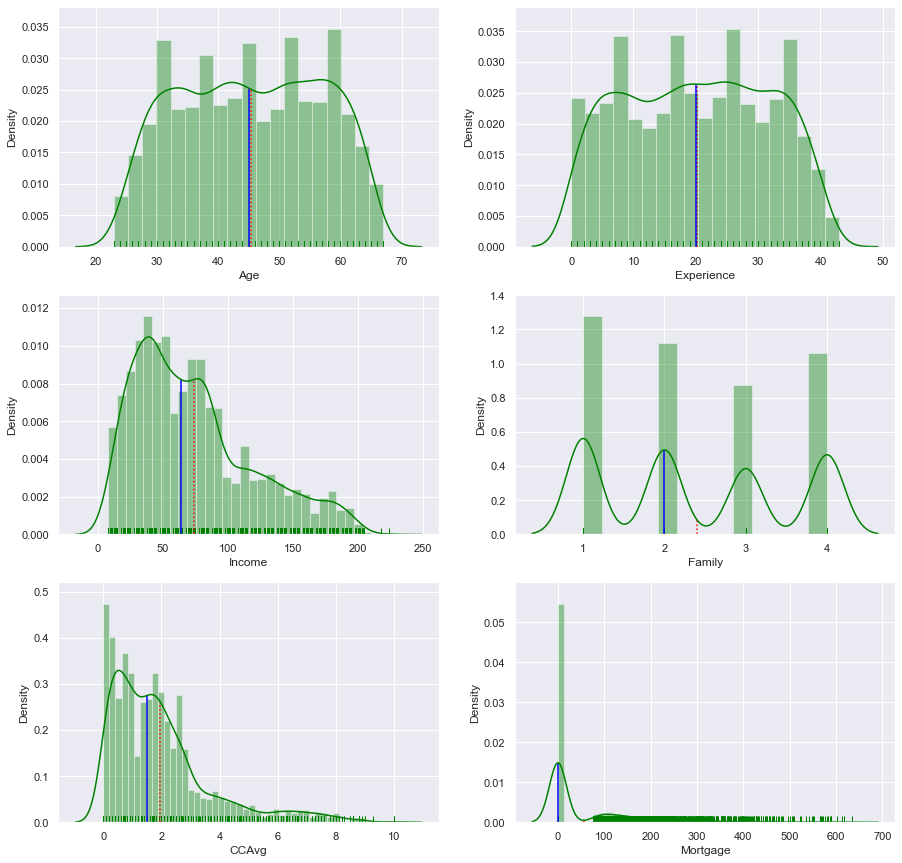

In [11]:
# plotting histograms for all numerical variables.

# List of numerical varaibles.
numerical_col = ['Age','Experience','Income','Family','CCAvg','Mortgage']
# A plot with 3 rows and 2 columns, both zero indexed. 
# Row i and Column j represented by axes[i,j] will represnt one histogram
# For example the 4th numerical variabble from numerical_col will have an index equal to 3
# int(3/2)=1 and 3%2=1(the rest) that will be in row number 2 and column number 2
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
for i in range(len(numerical_col)):    
    ax= sns.distplot(ax=axes[int(i/2), i%2], x=dfLoanModel[numerical_col[i]], color='green',rug=True, axlabel=numerical_col[i]) 
    line = ax.lines[0]
    xs = line.get_xdata()
    ys = line.get_ydata()
    # Plotting a dotted  red line for the mean after calculting the mean and the height of the line
    mean = dfLoanModel[numerical_col[i]].mean()
    height_mean = np.interp(mean, xs, ys)
    ax.vlines(mean, 0, height_mean, color='red', ls='dotted')
    # Plotting a solid blue line for the median after calculting the median and the height of the line
    median = dfLoanModel[numerical_col[i]].median()
    height_median = np.interp(median, xs, ys)
    ax.vlines(median, 0, height_median, color='blue', ls='solid')

**Observations**
- Age and Experience are somewhat normaly distributed where the mean equals the median. 
- The rest of variables distribution is positively skewed where the Mean is higher than the median which indicates that most of the outliers are present on the right side of the distrubtion(very high values)

####  Investigating outliers in every numerical column

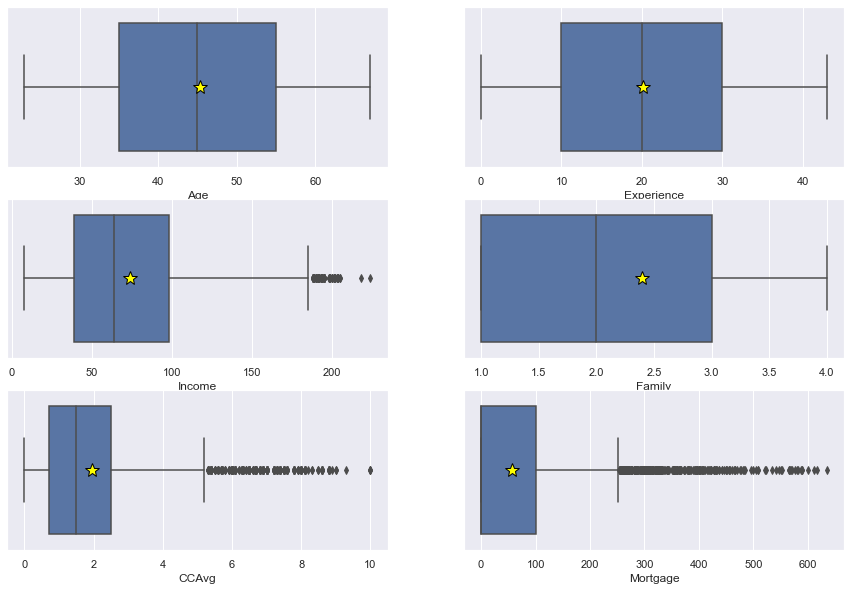

In [12]:
# outlier detection using boxplot
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
# A plot with 4 rows and 2 columns, both zero indexed. 
# Row i and Column j represented by axes[i,j] will represnt one boxplot
# For example the 7th numerical variabble from numerical_col here is Power will have an index equal to 6
# int(6/2)=3 and 6%2=0(the rest) that will be in row number 3(second row) and column number 0(first column)

for i in range(len(numerical_col)):    
    sns.boxplot(ax=axes[int(i/2), i%2], data=dfLoanModel , x=dfLoanModel[numerical_col[i]],\
                # Plotting the mean on theboxplot as a yellow star with a black edge
                showmeans=True, meanprops={"marker":"*", "markerfacecolor":"yellow", \
                "markeredgecolor":"black","markersize":"15"})  


**Observations**
* Age, Experience, and Family variables have no outliers.
* Income, CCAvg, and Mortgage variables have upper outliers.
* We will treat these outliers by assigning the higher wisker value to upper outliers, Decision Tree is robust to outliers but Logistic regression isn't

#### Distribution of  Categorical Variables

In [13]:
#Function to add the percentage of each class of the category
def perc_on_bar(plot, feature):
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage

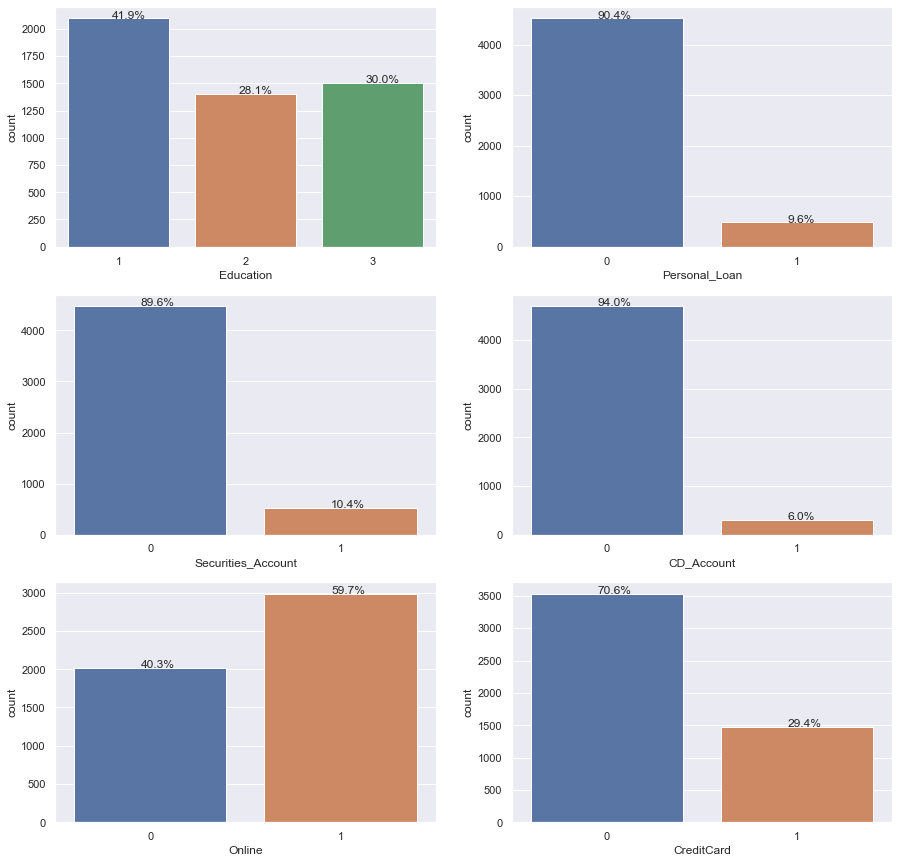

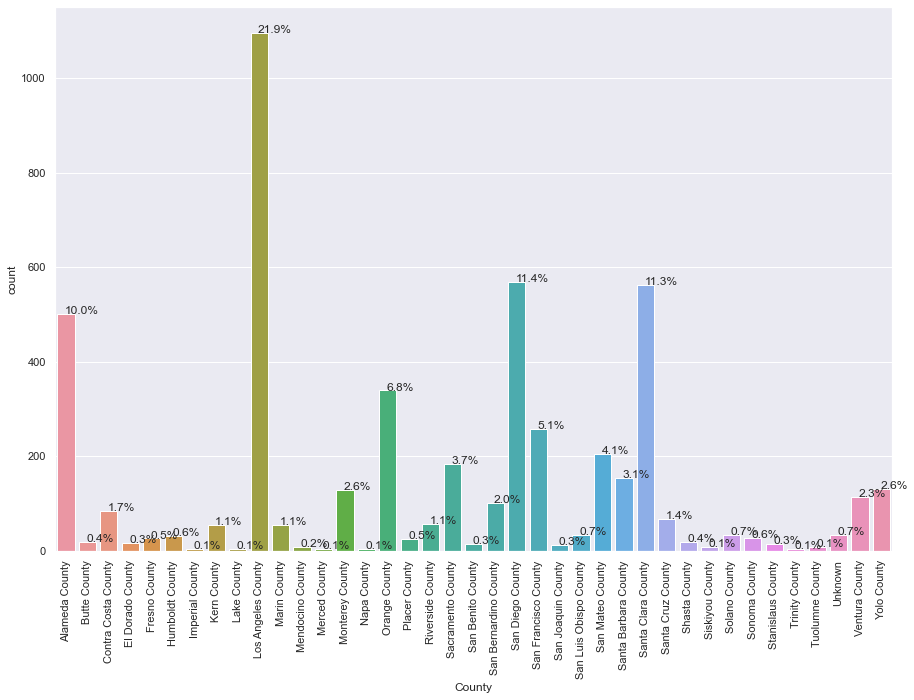

In [14]:
# Plotting barplots for categorical variables.
catgorical_col=['Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
# A plot with 4 rows and 2 columns, both zero indexed. 
# Row i and Column j represented by axes[i,j] will represnt one boxplot
# For example the 7th numerical variabble from numerical_col here is Power will have an index equal to 6
# int(5/2)=2 and 6%2=0(the rest) that will be in row number 2(third row) and column number 0(first column)

for i in range(len(catgorical_col)):    
    ax=sns.countplot(ax=axes[int(i/2), i%2], data=dfLoanModel , x=dfLoanModel[catgorical_col[i]])  
    perc_on_bar(ax, dfLoanModel[catgorical_col[i]])
# Plotting the barplot for County Seperately for a better visualization    
plt.figure(figsize=(15,10))
ax = sns.countplot(dfLoanModel["County"])
# Rotating the class labels so they won't overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
perc_on_bar(ax,dfLoanModel["County"])

**Observations**
* Most of the customers have undergraduate degree: 41.9%, while 30% of the bank customers have an advanced degree, and 28.1% have a graduate degree.
* Just 9.6% of the customers accepted a personal loan offer last year, and the rest 90.4% rejected the offer.
* 89.6% of the customers don't have a securities account and 94% of the customers don't have CD account.
* 59.7% of the customers use internet banking facilities and 40.3% don't.
* 70.6% of the customers don't use a credit card issued by any other Bank and 29.4% do.
* Most of AllLife bank live in Los Angeles County 21.9%, then in San Diego County with 11.4% then in Sanat Clara county with 11.3%, while there a lot of counties that have just 0.1%(5 customers) of the bank customers like Imperial, Napa, and Lake counties.



### Bivariate Analysis

In [15]:
#### Relationship between numerical variables using pair plots and correlation plots 

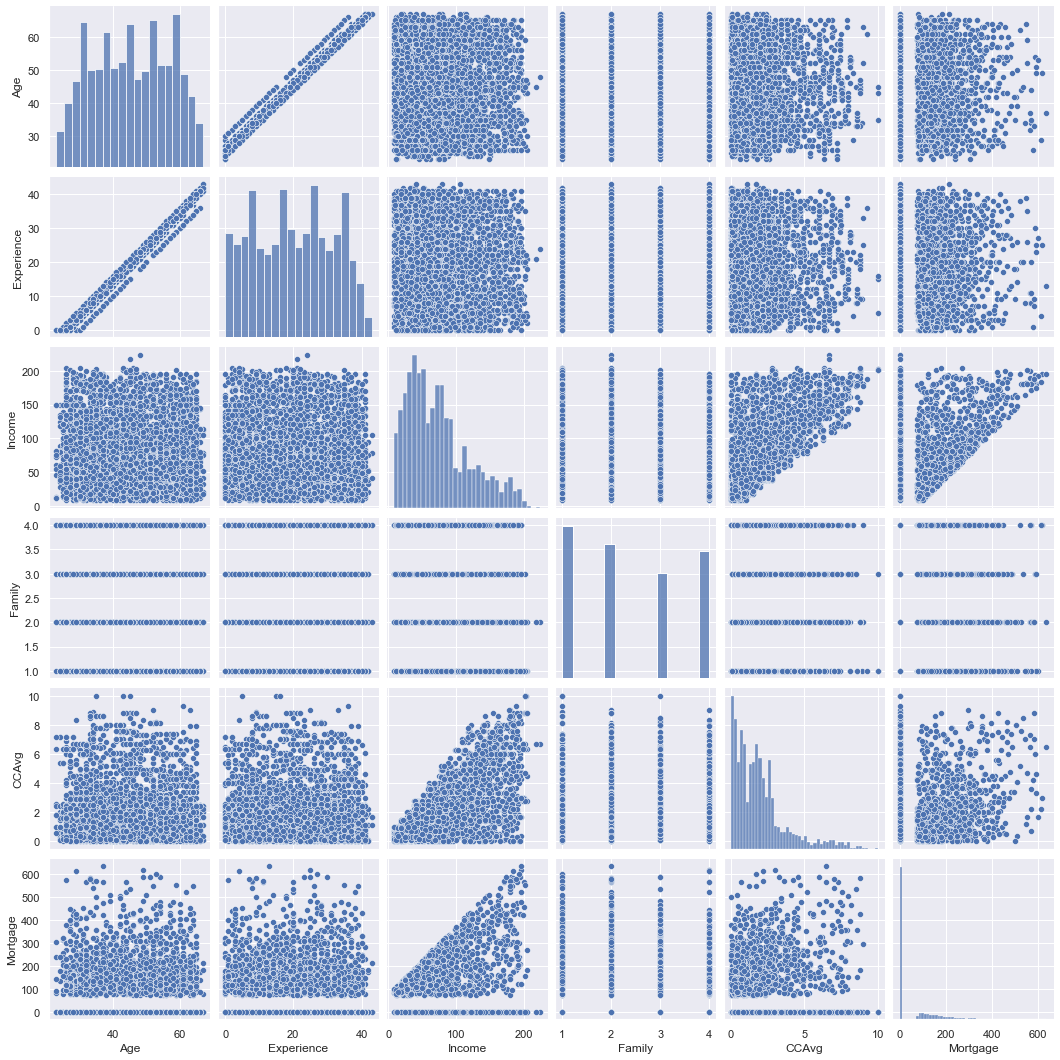

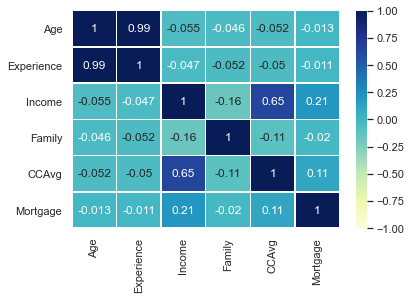

In [16]:
# pairplot: Visualize pairwise relationship in the dataset.
sns.pairplot(dfLoanModel[numerical_col])
plt.show()
# heatmap: Plot rectangular data as a color-encoded matrix, where each cell represents the correlation between 
# the two corresponding quantitative attributes
sns.heatmap(dfLoanModel[numerical_col].corr(), annot=True, linewidths=0.5, center=0, cmap='YlGnBu', vmin=-1, vmax=1)
plt.show()

**Observations**
* As excpected, there is a very strong positive correlation between Expereince and Age.
* There is a strong correlation between Income and CCAvg which is expected as well.
* There are no strong correaltions between the other numerical variables.

####  Personal_Loan vs Age

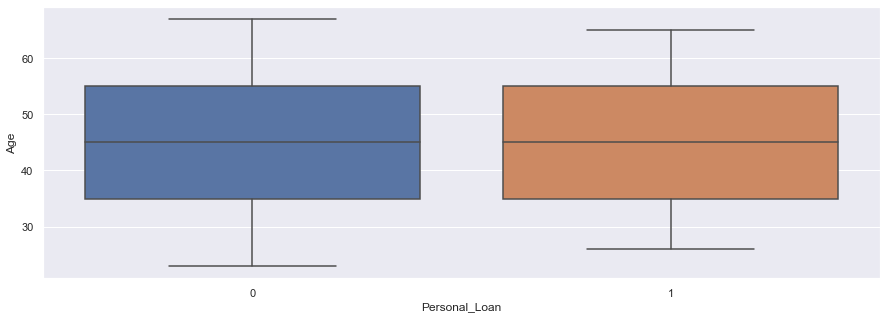

In [17]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(15,5))
sns.boxplot(x='Personal_Loan',y="Age",data=dfLoanModel);

**Observations**
* The median Age for customers that accepted the personal loan offer and didn't is the same.

#### Personal_Loan vs Mortgage

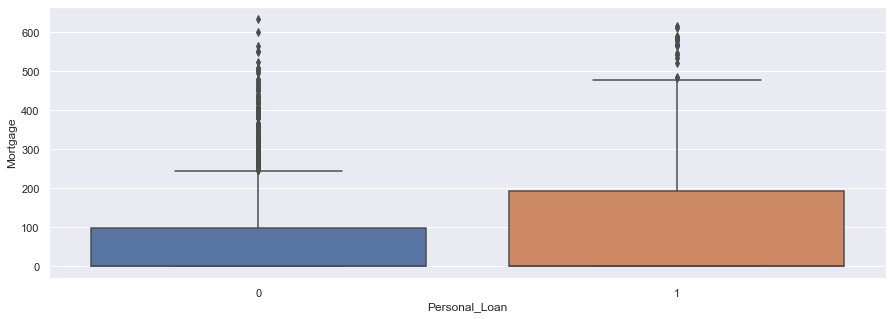

In [18]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Personal_Loan',y='Mortgage',data=dfLoanModel);

**Observations**
* Customers with higher Mortgage tend to more accept the personal loan offer. 

####  Personal_Loan vs CCAvg

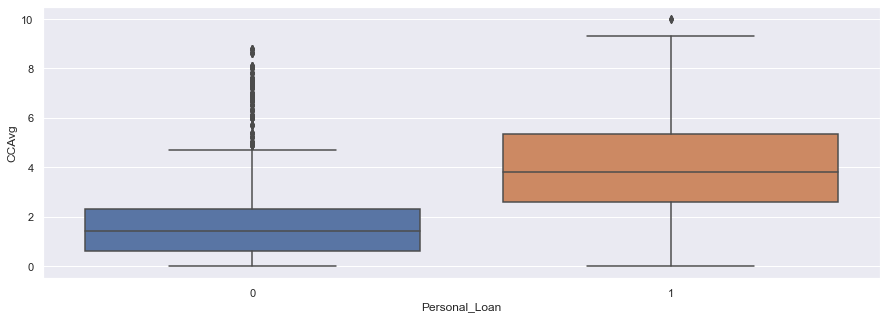

In [19]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Personal_Loan',y='CCAvg',data=dfLoanModel);

**Observations**
* Customers that accepted the personal loan offer have a higher median CCAvg than customers that refused the personal loan offer
* For the next campaign the bank should focus on customers with higher CCAvg

####  Personal_Loan vs Experience

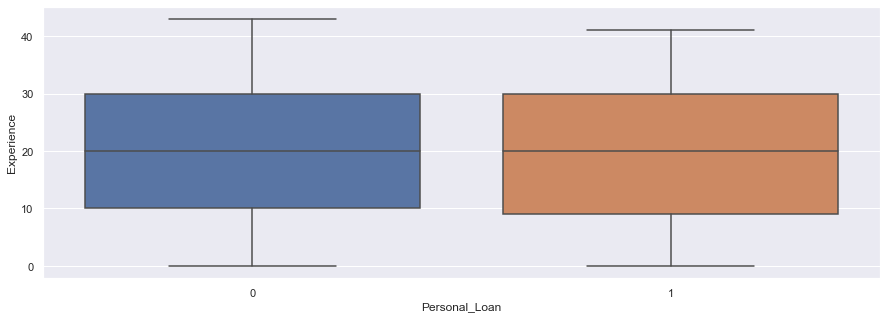

In [20]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Personal_Loan',y='Experience',data=dfLoanModel);

**Observations**
* The median Experience for customers that accepted the personal loan offer and didn't is the same.

####  Personal_Loan vs Income

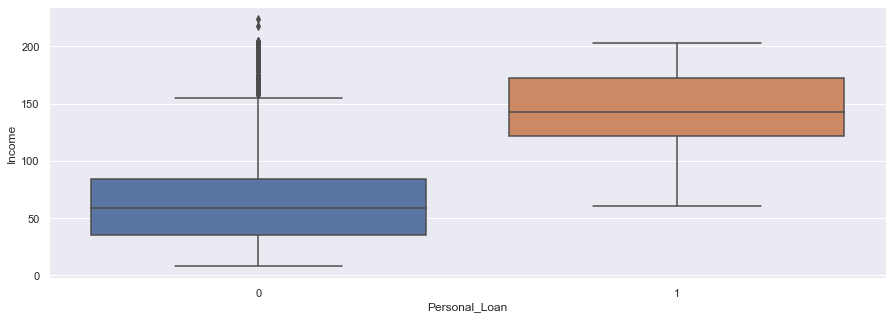

In [21]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Personal_Loan',y='Income',data=dfLoanModel);

**Observations**
* Customers that accepted the personal loan offer have a higher median Income than customers that refused the personal loan offer
* For the next campaign the bank should focus on customers with higher Income.

In [22]:
# Function to plot a stacked bar charts of Personal_Loan vs an independent variable
def stacked_plot(x):
#     sns.set(palette='twilight_shifted')
    tab1 = pd.crosstab(x,dfLoanModel['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,dfLoanModel['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Personal_Loan vs Education

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


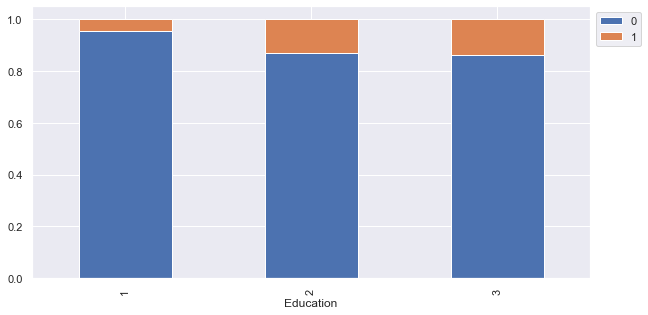

In [23]:
stacked_plot(dfLoanModel['Education'])

**Observations**
* The percentage of customers accepting the personal loan offer is about the same for customers with graduate or advanced degree and is higher than the ones with undergraduate degree.
* The bank should focus on customers with Education of Level 2 and 3 for the next campaign.

#### Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


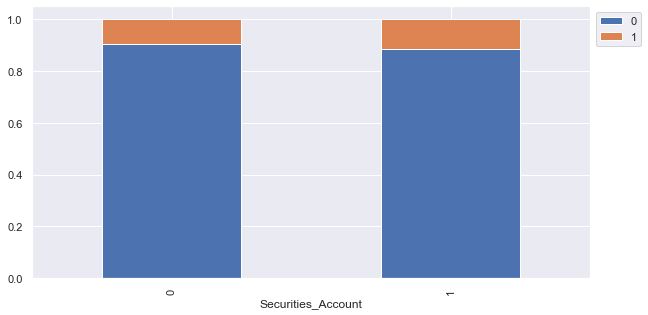

In [24]:
stacked_plot(dfLoanModel['Securities_Account'])

**Observations**
* The percentage of customers accepting the personal loan offer is higher for customers having securities account than the ones that they don't.

#### Personal_Loan vs County

Personal_Loan              0    1   All
County                                 
Alameda County           456   44   500
Butte County              17    2    19
Contra Costa County       73   12    85
El Dorado County          16    1    17
Fresno County             24    2    26
Humboldt County           30    2    32
Imperial County            3    0     3
Kern County               47    7    54
Lake County                4    0     4
Los Angeles County       984  111  1095
Marin County              48    6    54
Mendocino County           7    1     8
Merced County              4    0     4
Monterey County          113   15   128
Napa County                3    0     3
Orange County            309   30   339
Placer County             22    2    24
Riverside County          50    6    56
Sacramento County        169   15   184
San Benito County         14    0    14
San Bernardino County     98    3   101
San Diego County         509   59   568
San Francisco County     238   19   257


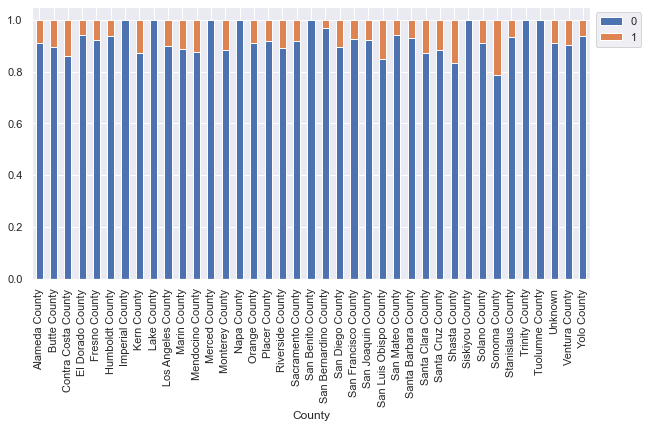

In [25]:
stacked_plot(dfLoanModel['County'])

**Observations**
* The percentage of customers accepting the personal loan offer is the highest for customers living in Sonoma, Shasta, San Joaquin,Contra Costa, kern counties.
* The percentage of customers accepting the personal loan offer is zero for customers living in Trinity, Imperial, Lake,Merced, Napa,San Benito,Trinity, Tuolumne, and Siskiyou counties.

#### Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


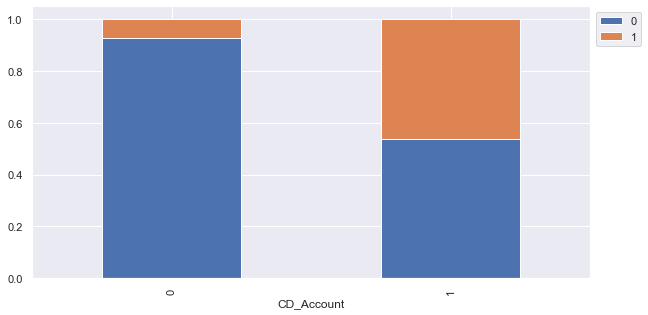

In [26]:
stacked_plot(dfLoanModel['CD_Account'])

**Observations**
* The percentage of customers accepting the personal loan offer is  way higher for customers having CD account than the ones that they don't, about half of customers having CD account accepted the offer which is also way higher than the 9.6% rate of all customers accepting the personal loan offer.
* The bank should focus on customers having CD account in the next compaign.

#### Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


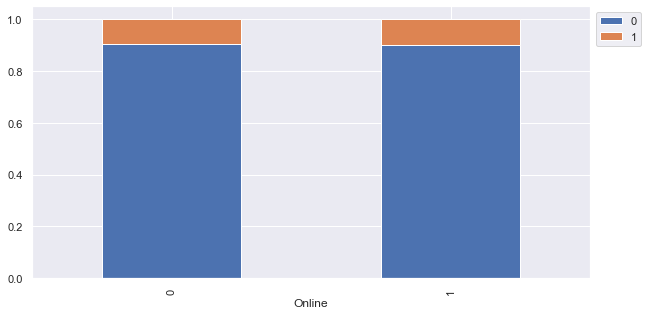

In [27]:
stacked_plot(dfLoanModel['Online'])

**Observations**
* The percentage of customers accepting the personal loan offer is about the same for customers using internet bank facilities nad customers that thry don't.

#### Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


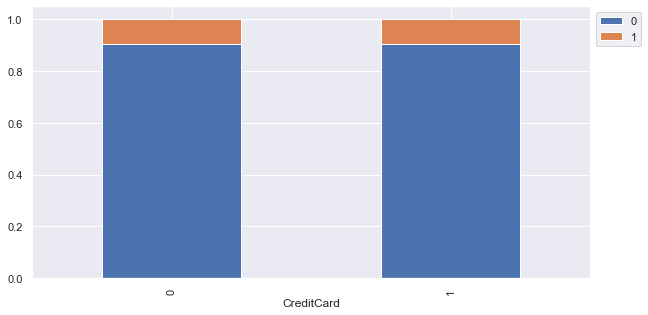

In [28]:
stacked_plot(dfLoanModel['CreditCard'])

**Observations**
* The percentage of customers accepting the personal loan offer is about the same for customers using credit cards from other banks and customers using only credit cards from only ALLlife bank.

#### Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


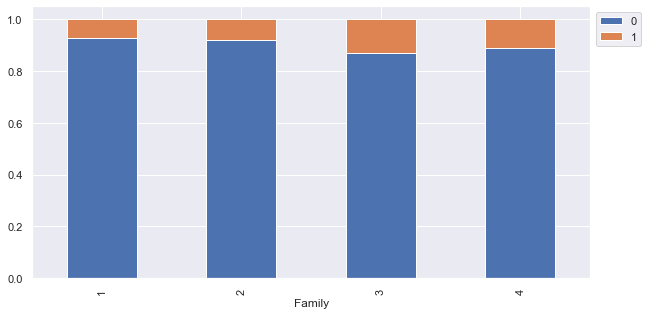

In [29]:
stacked_plot(dfLoanModel['Family'])

**Observations**
* The percentage of customers accepting the personal loan offer is higher(about the double) for customers with family size of 3 and 4 than families with size 1 and 2.
* It is higher for families with size 3 than 4, and about the same for families of size 1 and 2.
* In the coming compaign the bank should focus on families of size 3 and 4.

### Fixing the outliers for Income, CCAvg, and Mortgage

In [30]:
# Functions to treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)    
    return df
    

In [31]:
#List of numerical variables that needs to be treated 
num_columns=['Income', 'CCAvg', 'Mortgage' ]
#Treating the outliers in dfLoanModel
dfLoanModel = treat_outliers_all(dfLoanModel,num_columns)

### Model evaluation criterion

#### ALLlife bank faces two possible losses
1. Could offer a personal loan to customers that will rejected(False Positives\ Type 1 error) - Loss of effort by offering the personal loan to customers who will rejected, however this won't affect the conversion rate(customers accepting the personal loan) which the goal of the coming compaign.
2. Not give personal loan to customers that will accepted(False Negatives\ Type 2 error) - Loss of opportunities of offering the personal loan to customers who will accepted, which is the main goal of the campaign

#### Conclusion
- In our case False Negatives is more costly to ALLlife bank, therefore our goal will be to try to maximize the Recall score(greater the recall lesser the chances of false negatives), and to achieve a good accuracy as well since we can achieve a Recall of 100% by predicting 1(Accepting the personal loan) for all the data set. 

**Fist, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [32]:
##  Function to calculate different metric scores of the model - Accuracy, Recall 
def get_metrics_score(pred_train,pred_test,train_y,test_y):
    '''
    pred_train: model prediction for the train set
    pred_test: model prediction for test set
    train_y: groud truth for train
    test_y: ground truth for test
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
 
    score_list.extend((train_acc,test_acc,train_recall,test_recall))
        
    print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
    print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
    print("Recall on training set : ",recall_score(train_y,pred_train))
    print("Recall on test set : ",recall_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [33]:
# Function to create the confusion matrix
def make_confusion_matrix(y_predict,y_actual,labels=[1, 0]):
    '''
    y_predict : the model prediction
    y_actual : ground truth  
    
    '''
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Data Preparation

In [34]:
# We will drop the ZIPCode variable and we will keep the county Variable to reduce the dimension, also we will drop Age variable
# since it has a very high correlation with Experience(0.99).
dfLoanModel.drop('ZIPCode', axis=1, inplace=True)
dfLoanModel.drop('Age', axis=1, inplace=True)
# independant variables
X = dfLoanModel.drop('Personal_Loan', axis=1)
# the dependent variable
y = dfLoanModel[['Personal_Loan']]
# Creating dummies variable for the catgorical varaibles
X = pd.get_dummies(X, drop_first=True)
# Split X and y into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
# Checking the distribution of the split
print(f'There are {X_train.shape[0]} observations in the train set and there are {X_test.shape[0]} in the test set')
print(f'In the train set {y_train.value_counts()[1]} observations with target value of 1 and in the test set {y_test.value_counts()[1]} observations with target value of 1')


There are 3500 observations in the train set and there are 1500 in the test set
In the train set 331 observations with target value of 1 and in the test set 149 observations with target value of 1


## Building our  Logistic Regression Model

###  Checking if our variables has multicollinearity
* We did drop Age that have a very high correlation with Experience:0.98, but we will still check for possible multicollinearity between the other variables.
* There are different ways of detecting (or testing) multi-collinearity, one such way is Variation Inflation Factor.
* Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression coefficients estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient βk is “inflated”by the existence of correlation among the predictor variables in the model.
* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and hence the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use.

In [35]:
# dataframe with numerical column only(without the target)
num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                           27.319397
Experience                       1.015846
Income                           1.826813
Family                           1.055238
CCAvg                            1.707326
Mortgage                         1.029284
Education_2                      1.280864
Education_3                      1.253022
Securities_Account_1             1.143683
CD_Account_1                     1.339589
Online_1                         1.049867
CreditCard_1                     1.121004
County_Butte County              1.037278
County_Contra Costa County       1.153791
County_El Dorado County          1.031940
County_Fresno County             1.047575
County_Humboldt County           1.058545
County_Imperial County           1.006695
County_Kern County               1.098489
County_Lake County               1.010890
County_Los Angeles County        2.495743
County_Marin County              1.099129
County_Mendocino County          1.017101

**Observations**
* There's no multicollinearity present, we can rely on the model to make interpretations.

In [36]:
# Building the Logistic Regression model
model = LogisticRegression(random_state=1)
logistic_regression = model.fit(X_train,y_train)

In [37]:
# Getting the coefficients.
log_odds = logistic_regression.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=['coef']).T

,Experience,Income,Family,CCAvg,Mortgage,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Unknown,County_Ventura County,County_Yolo County
coef,-0.001153,0.044470,0.577854,0.383302,0.000505,2.184912,2.311464,-0.832646,4.836596,-1.137924,-1.558281,-0.099560,-0.117841,-0.064132,0.035120,-0.190775,-0.004425,0.119310,-0.028612,-0.769826,-0.004586,-0.035597,-0.081118,-0.164983,-0.041090,-1.071068,-0.028538,-0.058680,-0.386650,-0.100893,-0.733355,-0.445123,-0.512798,0.026354,-0.081265,-1.063345,-0.358922,-0.767887,-0.174762,-0.026030,-0.030229,-0.099869,0.219083,-0.081860,-0.045531,-0.019558,-0.074528,-0.135989,-0.434223


**Coefficient interpretations**
- Coefficient of Income, Family, CCAvg, Mortgage, Education level 2 and 3, CD_Account, County_Fresno County, County_Kern County  County_San Joaquin County, and County_Sonoma County are positive, increase in these will lead to increase in chances of a customer accepting the personal loan offer.
- Among the most important variables that will increase the chance of accepting the loan offer is:
  - customers having CD accounts. 
  - The higher the income the higher is the chance of accepting the offer.
  - Customers with Advanced\Professional degrees, then customers with graduate degrees
  - The bigger the size of the family the higher the chance of accepting the personal loan the bigger
- Coefficient of rest of the columns is negative, increase in these will lead to decrease in chances of a customer accepting the personal loan offer. Among the variables that deacreases the chanceof accepting the personal loan offer the most are:
  - Customers using online banking facilities.
  - Customers having securities accounts.
  - Customers using credit cards from other banks

###  Converting coefficients to odds for easier interpretation

**Odds:**
* When coefficient is b , then change in odds is (exp(b)-1)*100 %
* Probability = odd/(1+odd)

In [38]:
odds = (np.exp(np.abs(logistic_regression.coef_[0]))-1)*100
pd.set_option('display.max_rows',None)
pd.DataFrame(odds, X_train.columns, columns=['odds']).T

,Experience,Income,Family,CCAvg,Mortgage,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Unknown,County_Ventura County,County_Yolo County
odds,0.115374,4.547333,78.221014,46.712073,0.050480,788.987042,908.918707,129.939542,12503.962600,212.028358,375.064902,10.468503,12.506499,6.623274,3.574403,21.018657,0.443478,12.671861,2.902483,115.939092,0.459644,3.623833,8.449927,17.937261,4.194575,191.849603,2.894865,6.043604,47.204135,10.615858,108.205334,56.068167,66.995802,2.670400,8.465777,189.604065,43.178461,115.520798,19.096225,2.637164,3.069069,10.502615,24.493415,8.530411,4.658357,1.975024,7.737584,14.566978,54.376354


**Coefficient interpretations**
- Experience: 1 unit increase in Experience will reduce the odds of a customer accepting the offer by  by 0.11%(while holding     the other features constant, this will be true for the rest of the features interpretation)
- Income: 1 unit increase  will increase the odds of of a customer accepting the personal loan by ~4.55%
- Family: 1 unit increase will increase the odds of of a customer accepting the personal loan by ~78.22%
- CCAvg: 1 unit increase will increase the odds of of a customer accepting the personal loan by ~46.71%
- Mortagage: 1 unit increase will increase the odds of of a customer accepting the personal loan by ~0.05%
- Education: Customers with graduate degree will increase the odds by 788.98%, while customers with advanced degree will         increase the odds by ~908.91%
- Customers with securities accounts will deacrease the odds of accepting the offer by ~129.93%
- Customers with CD accounts will increase the odds of accepting the personal loan by ~12503.96%
- Customers using online banking facilities will decrease the odds of accepting the personal loan by ~212.02%
- Customers using credit cards from another bank will decrease the odds by ~375.06%
- Customers living in Orange county will decrease the odds by 191.84%, while customers living in Los Angeles will decrease the   odds by 115.93%
- Customers living in Sonoma county will increas the odds by ~24%

## Evaluating and Improving the Model

### Model Evaluation

Accuracy on training set :  0.9537142857142857
Accuracy on test set :  0.9473333333333334
Recall on training set :  0.6072507552870091
Recall on test set :  0.5637583892617449


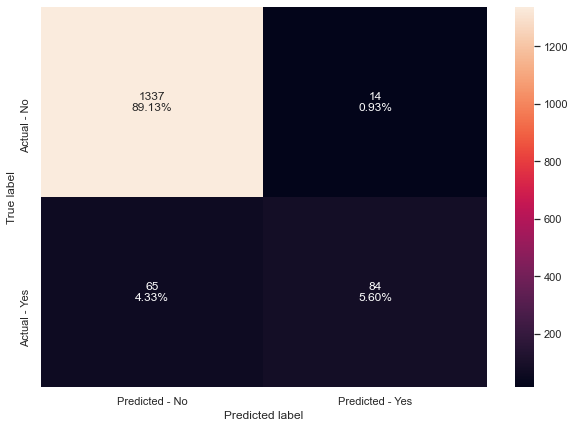

In [39]:
# Getting the evaluation metric scores
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
scores_LR = get_metrics_score(pred_train,pred_test,y_train,y_test)
# Creating confusion matrix
make_confusion_matrix(pred_test,y_test)

* ROC-AUC on training set

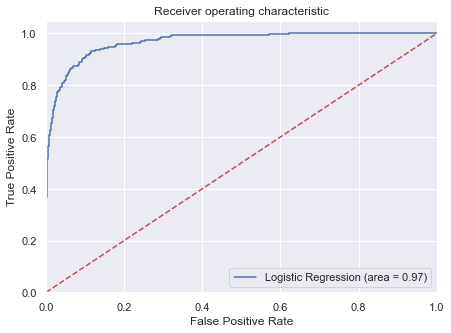

In [40]:
logit_roc_auc_train = roc_auc_score(y_train, logistic_regression.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, logistic_regression.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on testing set

In [41]:
logit_roc_auc_test = roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Observations**
- Model has given a generalized performance on training and test sets, accuracy(train:95.37, test:94.73), recall                 score(train:60.52, test:56.37%), and Area under the curve(train:97%, test:96%) for train and test are close and comparable.
- Accuracy is very high, but this can be achieved by assiging 0 as a value target for all observations since 90.4% of the         dataset is classified as rejecting the personal offer(target value of 0)
- Recall is the metric that we will use to really evaluate the model since we want to reduce the false negatives(Type 2 Error)   which are the costly\expensive error in our case (as explained earlier), however the recall is low and we should try to         improve it.
- Area under the curve is almost perfect(100% is the possible maximum value) 96% for test and 97% for train.
- True Postive Rate: 5.6%(84 of total test set) , True Negative rate:89.13%(1337 of toat test set) , False Positive               Rate:0.93(14 of total test set)%, and False Negative Rate:4.33%(65 of total test set).
- In this case study, our goal is to minimize the False Negative rate as maximum as possible, by doing so we will increase the   Recall score, also we want a good accuracy score as well sincde we can just assign 1 to the target value for all data set.

### Improving the Model Performance

* We will try to improve the Recall scores by changing the model threshold using AUC-ROC Curve.


In [42]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.08318230731434144


In [43]:
# Model prediction with optimal threshold
pred_train_opt = (logistic_regression.predict_proba(X_train)[:,1]>optimal_threshold).astype(int)
pred_test_opt = (logistic_regression.predict_proba(X_test)[:,1]>optimal_threshold).astype(int)

Accuracy on training set :  0.8862857142857142
Accuracy on test set :  0.8806666666666667
Recall on training set :  0.9305135951661632
Recall on test set :  0.8859060402684564


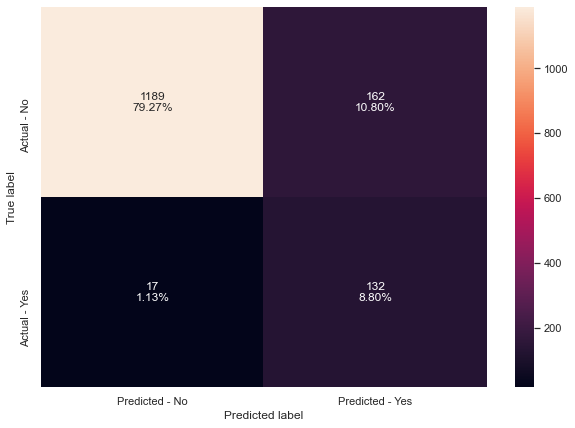

In [44]:
# Getting the evaluation metric scores
scores_LR = get_metrics_score(pred_train_opt,pred_test_opt,y_train,y_test)
# creating confusion matrix
make_confusion_matrix(pred_test_opt,y_test)

**Observations**
* By reducing the threshol from 0.5 to ~0.048, the model was successful in reducing the False Negatives rate by about 7 folds, it was decreased from 4.3% to 0.6%. This is really great and greatly improved the Recall score to 94.86% for training and 93.95% for testing.
* The Accuracy is still high it's 83.77% for train set and 84.2% for test set.
* The Model still gave a generalized performance as the Accuracy and Recall scores are very close for train and test sets.
* This Model did improve greatly as it did achieve our goal which is achieving a very high recall score: 93.95% (by setting the threshold to 0.048) and a good accuracy: 84.2%. Therefore Allife should use the latter model in predicting if the customers will accept the Personal loan offer or not. 

## Building our  Decision Tree(CART) Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, the frequency of accepting the personal loan is 9.4%(class 1) and rejecting the offer is 90.6%(class 0). Therefore we can pass a dictionary {0:0.10,1:0.9} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

Accuracy on training set :  1.0
Accuracy on test set :  0.9806666666666667
Recall on training set :  1.0
Recall on test set :  0.8657718120805369


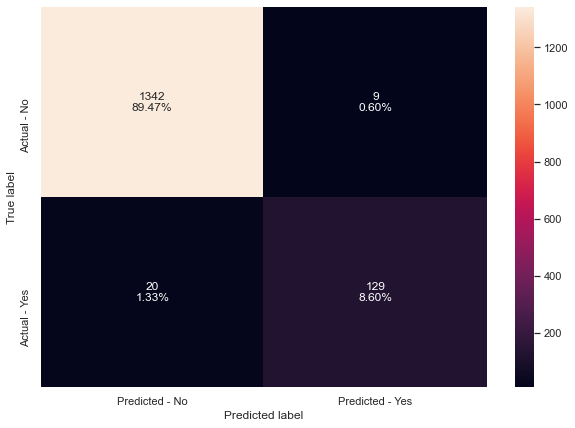

In [45]:
# Building the Decision Tree model
model_tree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.10,1:0.90},random_state=1)
model_tree.fit(X_train, y_train)
# Getting the Accuracy and Recall scores 
get_metrics_score(model_tree.predict(X_train),model_tree.predict(X_test),y_train,y_test)
# Getting the confusion matrix
make_confusion_matrix(model_tree.predict(X_test),y_test)

**Observations**
* Accuracy is very high and comparable for both train(100%) and test(98.06%) sets.
* Recall is perfect for the train set: 100% , but for test set is ~14% lesser: 86.57% . This is a sign of overfitting.

### Visualizing the Decision Tree

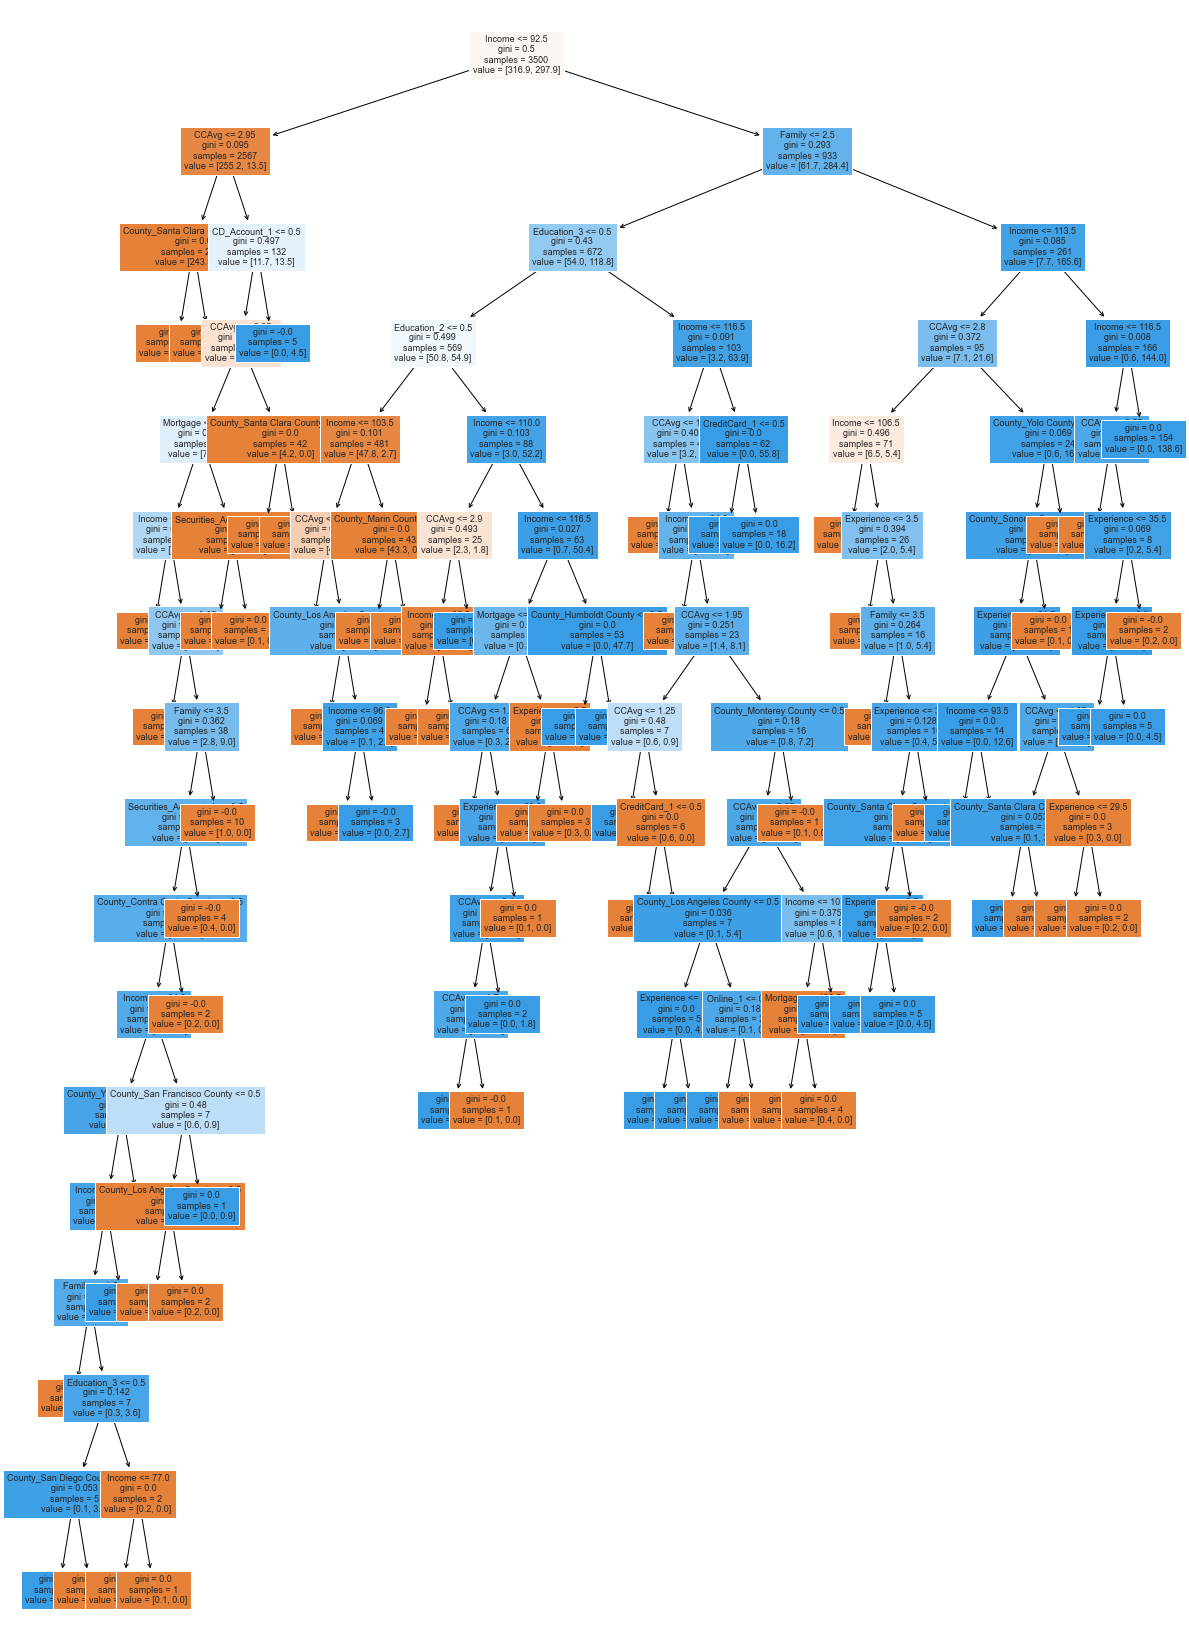

In [46]:
feature_names = list(X.columns)
plt.figure(figsize=(20,30))
out = tree.plot_tree(model_tree,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split 
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

### Rules of the Decision Tree

In [47]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model_tree,feature_names=feature_names,show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- County_Santa Clara County <= 0.50
|   |   |   |--- weights: [216.90, 0.00] class: 0
|   |   |--- County_Santa Clara County >  0.50
|   |   |   |--- weights: [26.60, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [1.10, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- Securities_Account_1 <= 0.50
|   |   |   |   |   |   |   |   |   |--- County_Contra Costa County <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |  

### Features Importance

In [48]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print (pd.DataFrame(model_tree.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                               Importance
Income                           0.635220
Education_2                      0.136712
CCAvg                            0.093783
Education_3                      0.051266
Family                           0.048757
CD_Account_1                     0.007690
Experience                       0.007217
Mortgage                         0.006524
County_San Francisco County      0.002344
County_Los Angeles County        0.002173
County_Santa Clara County        0.001890
Securities_Account_1             0.001879
County_Yolo County               0.001180
County_Contra Costa County       0.000995
County_San Diego County          0.000634
County_Sonoma County             0.000617
Online_1                         0.000586
County_Monterey County           0.000534
CreditCard_1                     0.000000
County_Humboldt County           0.000000
County_Marin County              0.000000
County_Tuolumne County           0.000000
County_Unknown                   0

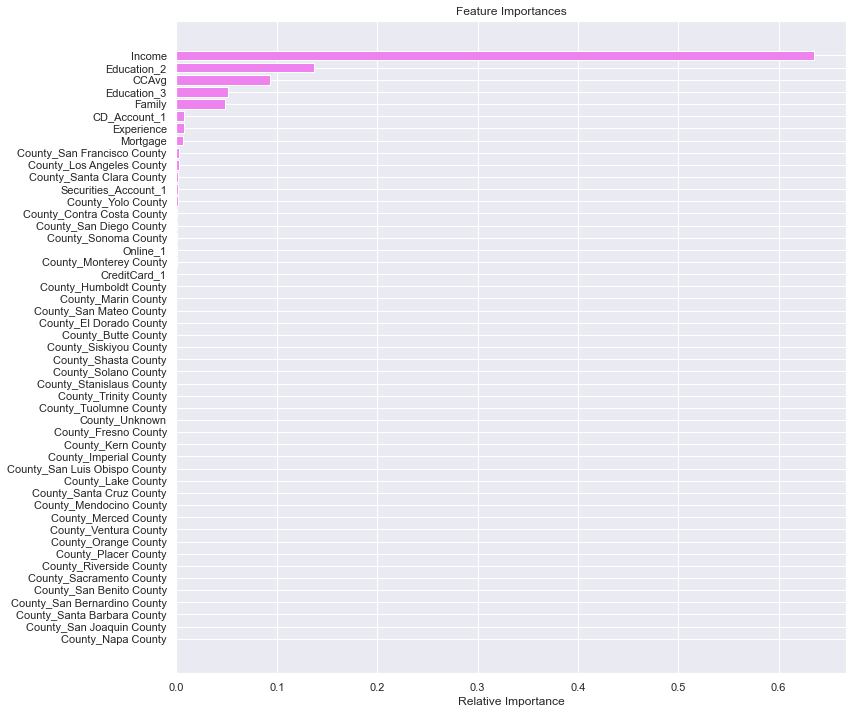

In [49]:
#Plotting the features importance
importances = model_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations**
* According to the decision tree model, Income is the most important variable for predicting if the customer will accept the personal offer, then Customers with graduate degree, then the monthly average spending on credit cards of customers, then customers with Advanced\Professional degree with, then the family size.
* **Beside the overfitting issue,the tree is very complex and difficult to interpret.**
* We will try to improve our model via two approaches: **Prepruning and Postpruning**

### Improving our Model by Prepruning

**Using GridSearch for Hyperparameter tuning of our tree model**
* This is a prepruning technique.
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [50]:
# Importing the GridSearchCV library
from sklearn.model_selection import GridSearchCV

In [51]:
# Choose the type of classifier. 
model_tree_prepruned = DecisionTreeClassifier(random_state=1,class_weight = {0:0.1,1:0.9})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
#             'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(model_tree_prepruned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_tree_prepruned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
model_tree_prepruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=2, min_impurity_decrease=1e-06,
                       random_state=1)

#### Model Evaluation

Accuracy on training set :  0.7902857142857143
Accuracy on test set :  0.7793333333333333
Recall on training set :  1.0
Recall on test set :  1.0


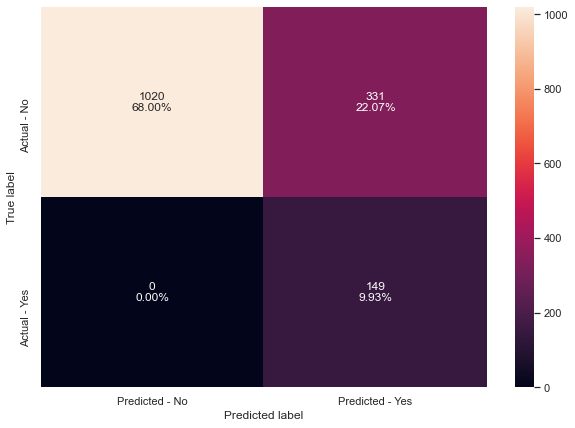

In [52]:
#Getting the accuracy and recall scores
get_metrics_score(model_tree_prepruned.predict(X_train),model_tree_prepruned.predict(X_test),y_train,y_test)
# Getting the confusion matrix
make_confusion_matrix(model_tree_prepruned.predict(X_test),y_test)

**Observations**
* This model achieved a perfect recall for train and test(100% for both)
* Both Accuracy and recall scores for train and test are very close, therefore we have a generalized model(no overfitting)
* The Accuracy dropped by over 20% than the original model, train set:79.02% , test set:77.93%. 

#### Visualizing the Decision Tree

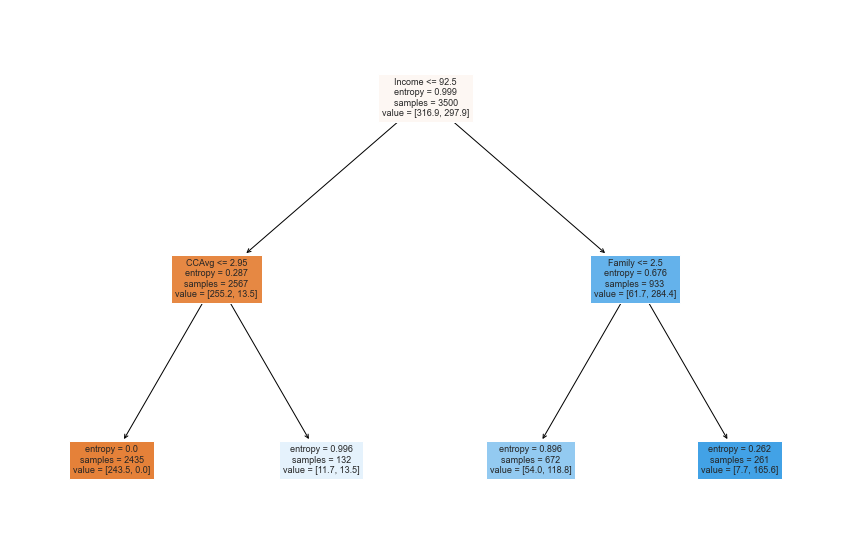

In [53]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(model_tree_prepruned,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

#### Rules of the Decision Tree

In [54]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model_tree_prepruned,feature_names=feature_names,show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [11.70, 13.50] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [54.00, 118.80] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [7.70, 165.60] class: 1



#### Features Importance

In [55]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )
print (pd.DataFrame(model_tree_prepruned.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))



                               Importance
Income                           0.779167
CCAvg                            0.133999
Family                           0.086834
Experience                       0.000000
County_Santa Clara County        0.000000
County_Sacramento County         0.000000
County_San Benito County         0.000000
County_San Bernardino County     0.000000
County_San Diego County          0.000000
County_San Francisco County      0.000000
County_San Joaquin County        0.000000
County_San Luis Obispo County    0.000000
County_San Mateo County          0.000000
County_Santa Barbara County      0.000000
County_Santa Cruz County         0.000000
County_Placer County             0.000000
County_Shasta County             0.000000
County_Siskiyou County           0.000000
County_Solano County             0.000000
County_Sonoma County             0.000000
County_Stanislaus County         0.000000
County_Trinity County            0.000000
County_Tuolumne County           0

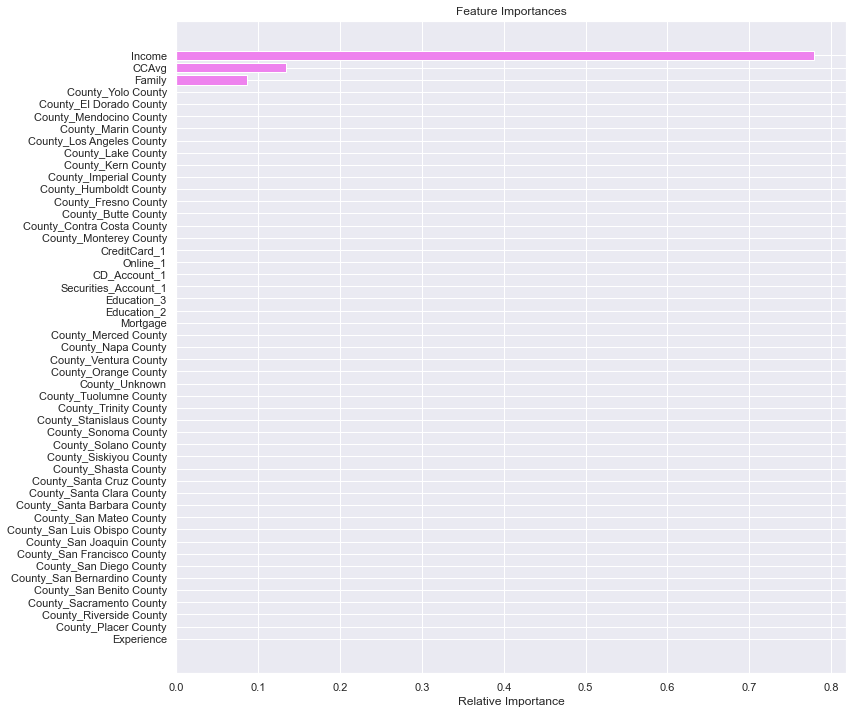

In [56]:
importances = model_tree_prepruned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observations:
* The tree is very simple(this can explain the big drop in the Accuracy score) and therefore it's so easy for interpretation.
* According to this model, Income is the most important variable for predicting if the customer will accept the personal offer,   then the monthly average spending on credit cards by the customers, then the family size.
* If the Income is more than 92.5K then the customers will accpet the personal loan offer.
* If the income is less or equal to 92.5K, then if the monthly average spending on credit cards is more than 2.95K  then the     customers will accept the personal loan offer otherwise the personal loan offer will be rejected.

### Improving our Model by Postpruning via Cost Complexity Pruning

In
`DecisionTreeClassifier`, Cost Complexity Pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``

#### Total impurity of leaves vs effective alphas of pruned tree

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [57]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.1,1:0.9})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,-0.000000
1,0.000000,-0.000000
2,0.000000,-0.000000
3,0.000000,-0.000000
4,0.000000,-0.000000
5,0.000000,-0.000000
6,0.000000,-0.000000
7,0.000000,-0.000000
8,0.000000,-0.000000
9,0.000000,-0.000000


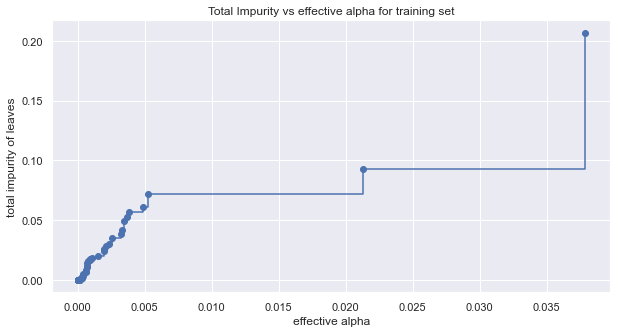

In [58]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [59]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.1,1:0.9})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.292878540198004



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

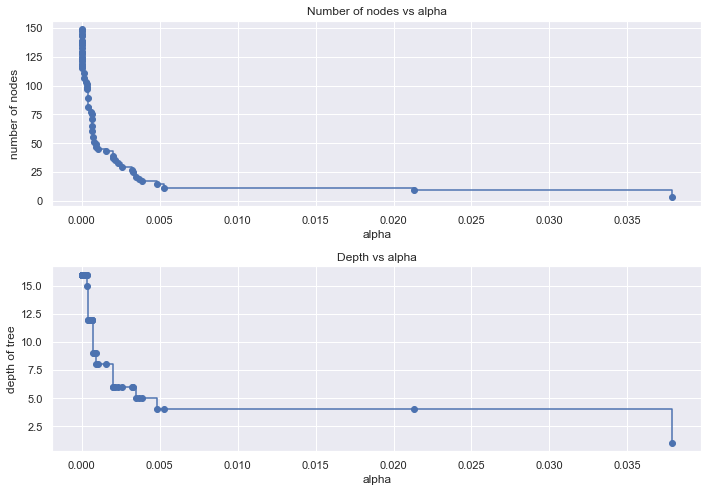

In [60]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Since  accuracy isn't the right metric for our data we would want high recall

In [61]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [62]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [63]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

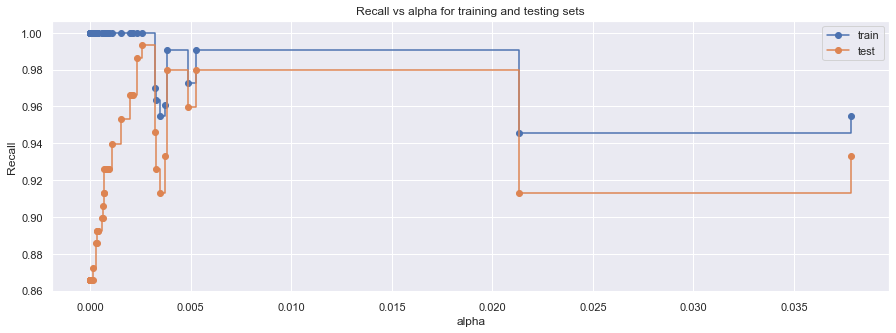

In [64]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [65]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
model_tree_postpruned = clfs[index_best_model]
model_tree_postpruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0025612633044608136,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)

#### Model Evaluation

Accuracy on training set :  0.9568571428571429
Accuracy on test set :  0.9486666666666667
Recall on training set :  1.0
Recall on test set :  0.9932885906040269


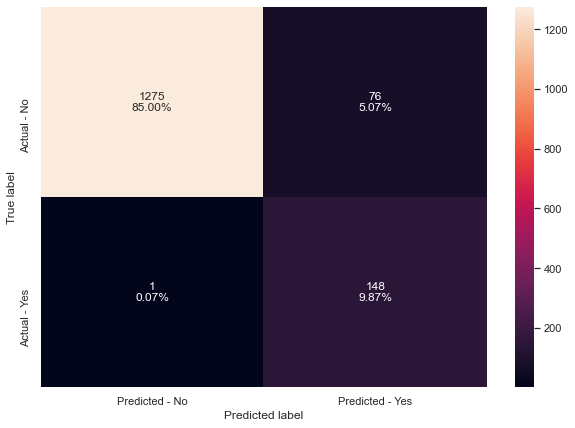

In [66]:
# Getting the accuracy and recall scores
get_metrics_score(model_tree_postpruned.predict(X_train),model_tree_postpruned.predict(X_test),y_train,y_test)
# Getting the confusion matrix
make_confusion_matrix(model_tree_postpruned.predict(X_test),y_test)                

**Observations**
* This model achieved a very high Recall scores for train set:100%  and for test set:99.33%(just 1 False Negative)
* The Accuracy achieved is also really high for train set:95.68% and for test set:94.86%.
* Both Accuracy and Recall scores for train and test are very close, therefore we have a generalized model(no overfitting)
* Among the three decision tree models built, this model:model_tree_postpruned achieved the best performance.  

#### Visualizing the Decision Tree

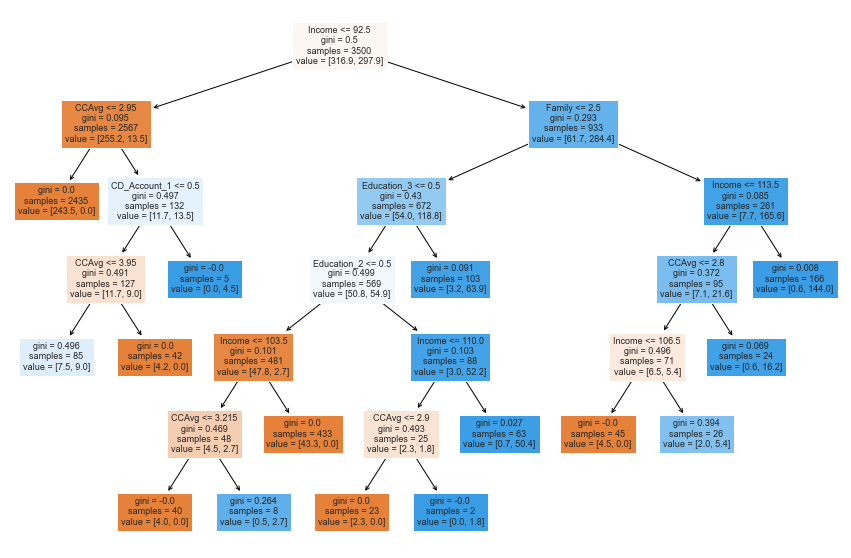

In [67]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(model_tree_postpruned,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

#### Rules of the Decision Tree

In [68]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model_tree_postpruned,feature_names=feature_names,show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [7.50, 9.00] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [4.20, 0.00] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [0.00, 4.50] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |   |--- weights: [0.50, 2.70] class: 1
|   |   |   |   |--- Income >  103.50
|   |   |   |   |   |--- weights: [43.30, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 110.00
|   |   |   |   |   |--- CCAvg <= 2.90
|   |   |   |   |   |   |--- weights: [2.30, 

#### Features Importance

In [69]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )
print (pd.DataFrame(model_tree_postpruned.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                               Importance
Income                           0.665485
Education_2                      0.147144
CCAvg                            0.081594
Education_3                      0.053918
Family                           0.043582
CD_Account_1                     0.008277
Experience                       0.000000
County_Santa Cruz County         0.000000
County_San Bernardino County     0.000000
County_San Diego County          0.000000
County_San Francisco County      0.000000
County_San Joaquin County        0.000000
County_San Luis Obispo County    0.000000
County_San Mateo County          0.000000
County_Santa Barbara County      0.000000
County_Santa Clara County        0.000000
County_Solano County             0.000000
County_Shasta County             0.000000
County_Siskiyou County           0.000000
County_Sacramento County         0.000000
County_Sonoma County             0.000000
County_Stanislaus County         0.000000
County_Trinity County            0

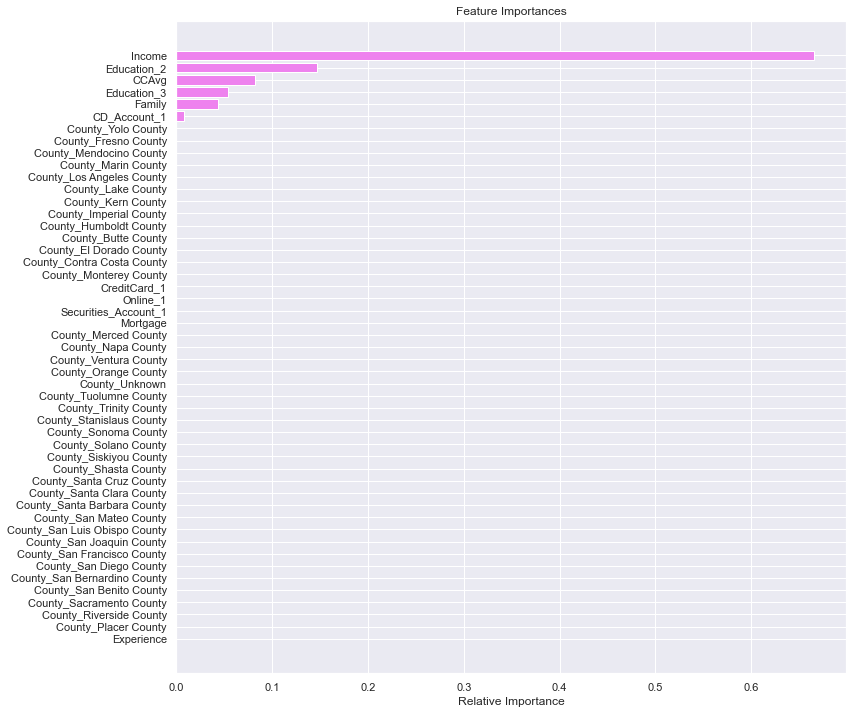

In [70]:
# Plotting the features importance 
importances = model_tree_postpruned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observations:
* The tree is simple and therefore it's  easy for interpretation.
* According to the decision tree model, Income is the most important variable for predicting if the customer will accept the     personal offer, then Customers with graduate degree, then the monthly average spending on credit cards of customers(CCAvg),     then customers with Advanced\Professional degree with, then the family size, and lastly if a customer have a CD account
* Customers with Income <= 92.50k and CCAvg <= 2.95 will reject the personal loan offer
* Customers with Income <= 92.50k and CCAvg > 2.95 will accept the offer unless they don't have a CD account and have
  CCAvg > 3.95 
* Customers with Income > 92.5k and a family size of 3 or 4 will accept the offer unless they have CCAvg <= 2.80k and 
  Income <= 106.50
* Customers with Income > 92.5k and a family size of 1 or 2 and with Advanced\Professional degree will accept the offer.
* Customers with Income > 92.5k and a family size of 1 or 2 and with undergraduate degree will reject the offer unless they       have CCAvg > 3.21K and Income <= 103.50K
* Customers with Income > 92.5k and a family size of 1 or 2 and with Graduate degree will accept the offer unless they have       Income <= 110.00K and CCAvg <= 2.90K.

## Insights and Conclusion

### Logistic Regression and Decision Tree Comparison

1. The best performance among  Logisitc Regression Models was achieved by reducing the threshol from 0.5 to ~0.048 which resulted in:
    - Recall score of 94.86% for train set and 93.95% for test test.
    - Accuracy score of 83.77% for train set and 84.2% for test set.
    - The model gave a very good generalized performance with good scores on the test set.
2. The best performance among the three Decision tree Model was achieved by model_tree_postpruned, that was achieved by Postpruning via Cost Complexity Pruning technique with a cost complexity parameter ccp_alpha of a value of ~0.0025. This model gave:
    - Recall score of 100% for train set and 99.33% for test test.
    - Accuracy score of 95.68% for train set and 94.86% for test set.
    - The model gave a very good generalized performance with a very good scores on the test set.
3. Clearly the Decision Tree model:model_tree_postpruned have a better performance than the Logisitc Regression Model.
    - The Decision Tree achieved a recall of 99.33% compared to the recall score of 93.95% for the Logistic Regression
    - The Decision Tree achieved an accuracy of 94.82% compared to the accuracy score of 84.2% for the Logistic Regression.
**AllLife Bank Marketing Team should use model_tree_postpruned in predicting if a customer will accept the Personal loan offer or not, if they do they should be targeted in the coming compaign**

### Recommendations

* In the coming Marketing compaign and in order to achieve the maximum rate of customers accepting the Personal Loan offer, AllLife Bank should target customers knowing that:
  - Customers with an Income less or equal to 92.5k and an average spending on credit cards per month less or equal to 2.95k will reject the personal loan offer
  - Customers with an Income less or equal to 92.5k and an average spending on credit cards per month bigger than 2.95k will accept the offer unless they don't have a CD account and their monthly average spending on credit card is bigger than 3.95k
  - Customers with an Income greater than 92.5k and a family size of 3 or 4 will accept the offer unless their monthly average spending on credir card is less or equal to 2.8k and their Income is less or equal to 106.50k.
  - Customers with an Income greater than 92.5k, and a family size of 1 or 2, and with Advanced\Professional degree will accept the offer.
  - Customers with an Income greater than 92.5k and a family size of 1 or 2, and with undergraduate degree will reject the offer unless their monthly average spending on credit card is bigger than 3.21K,  and their Income is less or equal to 103.5K
  - Customers with an Income greater than 92.5k and a family size of 1 or 2 and with Graduate degree will accept the offer unless their Income is less or equal to  110K and their monthly average spending on credit card is less or equal to 2.9K

## Exploratory Data Analysis on the incorrectly predicted data

In [71]:
# Making a Copy of dfLoanModel
dfLoanModelWrongPredict = dfLoanModel.copy()
# Adding a new column 'predicted_Personal_Loan' to the dataframe and conveting it to a category type
dfLoanModelWrongPredict['predicted_Personal_Loan'] =model_tree_postpruned.predict(X)
dfLoanModelWrongPredict['predicted_Personal_Loan']=dfLoanModelWrongPredict['predicted_Personal_Loan'].astype('category')
# Filtering thedataframe to include only the missclassified 
dfLoanModelWrongPredict= dfLoanModelWrongPredict.loc[dfLoanModelWrongPredict.Personal_Loan != dfLoanModelWrongPredict.predicted_Personal_Loan]
# Quick Analysis for the missclassified data
dfLoanModelWrongPredict.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Experience,228.000000,NaN,NaN,NaN,20.719298,11.272757,0.000000,13.000000,21.000000,29.000000,42.000000
Income,228.000000,NaN,NaN,NaN,91.188596,17.868695,51.000000,79.000000,93.000000,109.000000,115.000000
Family,228.000000,NaN,NaN,NaN,2.302632,1.168829,1.000000,1.000000,2.000000,3.000000,4.000000
CCAvg,228.000000,NaN,NaN,NaN,2.910526,1.190259,0.000000,2.075000,3.200000,3.700000,5.200000
Education,228.000000,3.000000,3.000000,106.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,228.000000,NaN,NaN,NaN,55.037281,93.599789,0.000000,0.000000,0.000000,108.250000,252.500000
Personal_Loan,228.000000,2.000000,0.000000,227.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Securities_Account,228.000000,2.000000,0.000000,201.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD_Account,228.000000,2.000000,0.000000,219.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Online,228.000000,2.000000,1.000000,140.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**
* 4.5% of the total customers(228 out of 5000) were missclassified.
* 46.5% of the missclassified customers have an Advanced\Professional degree.
* 96% of the missclassified customers  they don't have a CD Account.
* 88.15% of the missclassified customers  they don't have securities Account.
* 61.5 % of the missclassified customers they use online banking facilties.
* We have 227 False Positives, and 1 False Negative.
* Going forward we will focus on the analysis of CD_Account and securities_Account vs other features.

#### Distribution of Securities_Account and CD_Account  vs Education and Family

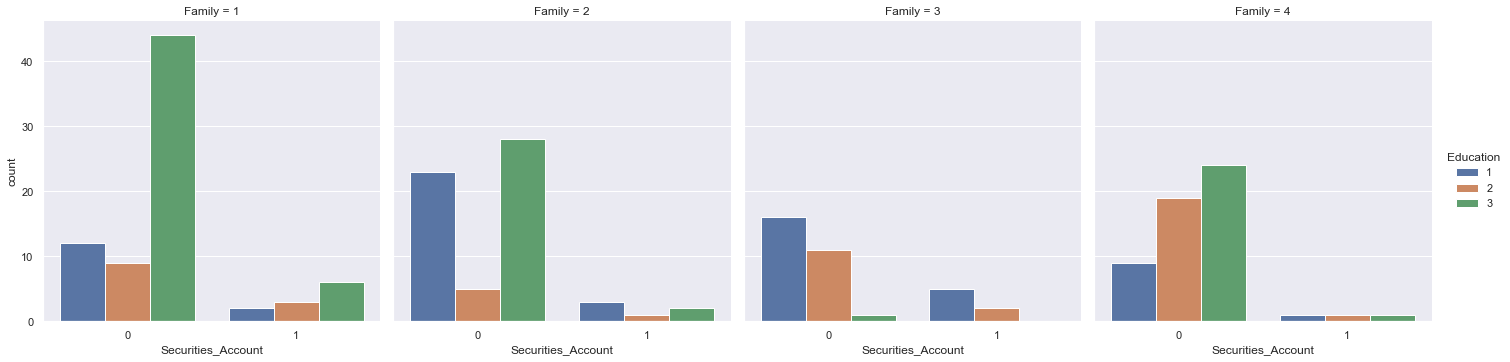

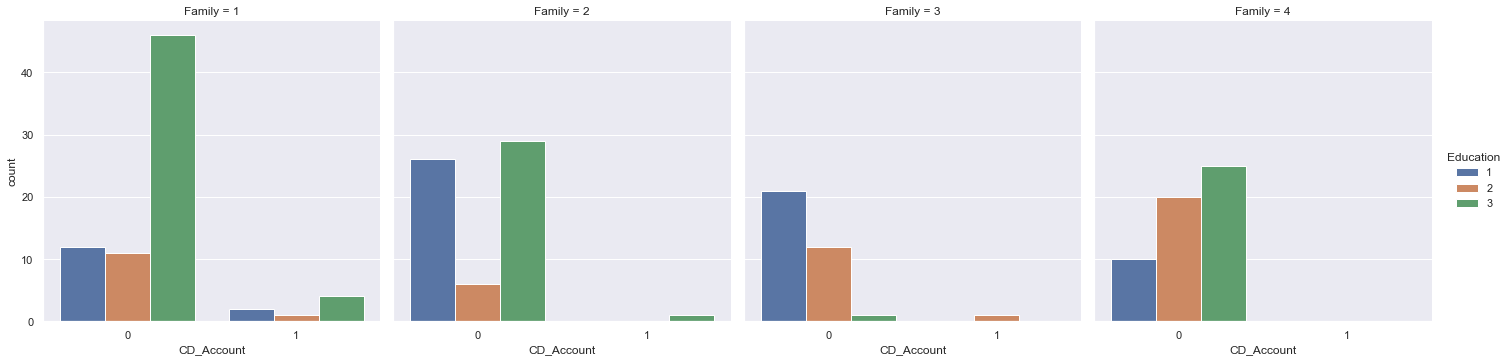

In [72]:
sns.catplot(x='Securities_Account', hue='Education', col='Family', data=dfLoanModelWrongPredict, kind='count' );
sns.catplot(x='CD_Account', hue='Education', col='Family', data=dfLoanModelWrongPredict, kind='count' );

**Observations**
* The missclassified customers are of all Family size and all Education level, however the majority are customers have a family size of 1 and a Advanced\Professional degree, this is true for both Securities and CD accounts.
* We also notice almost a similar pattern distribution of these two accounts vs Education and Family.

#### CD_Account vs Mortgage vs Family

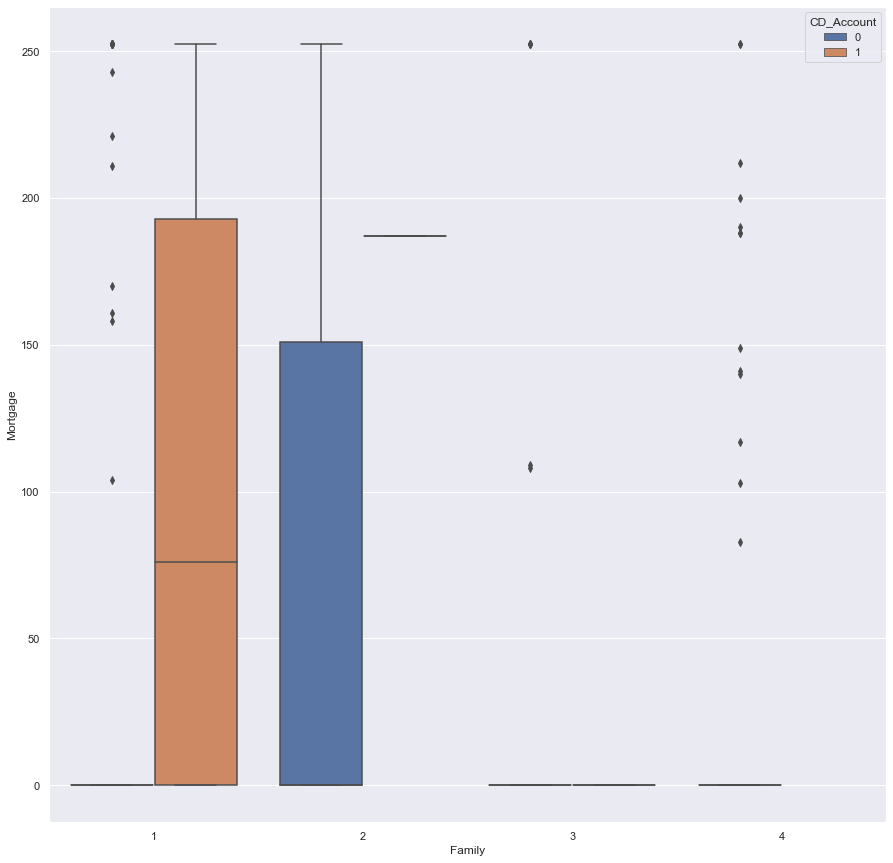

In [73]:
plt.figure(figsize=(15,15))
sns.boxplot(y=dfLoanModelWrongPredict['Mortgage'], x=dfLoanModelWrongPredict['Family'], hue= dfLoanModelWrongPredict['CD_Account']);

**Observations**
* The majority of the missclassified data were for customers with family size of 1 and 2 and a Mortgage value less the 250K.
* For customers with Family size of 1 all customers did have a CD_Account, but for customers with Familty size of 2 they didn't have a CD_Acount.

#### CD_Account vs Income vs Family

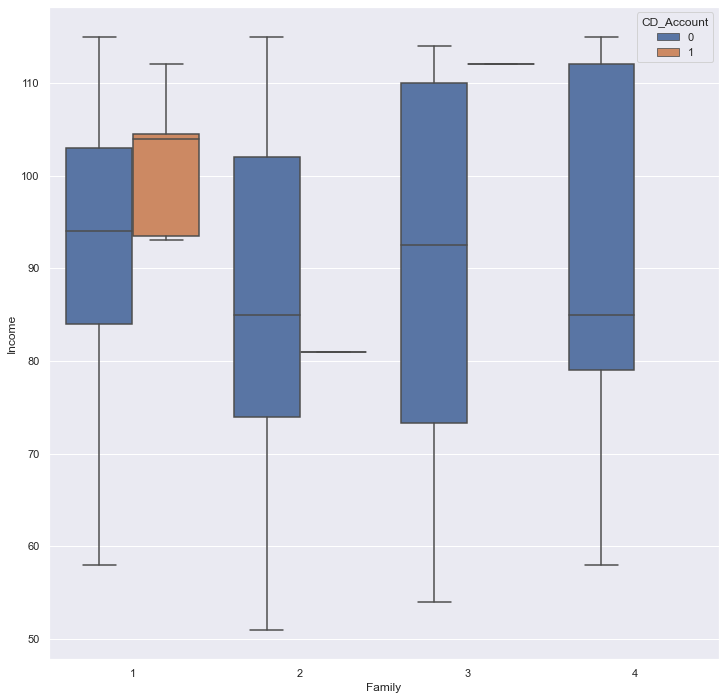

In [74]:
plt.figure(figsize=(12,12))
sns.boxplot(y=dfLoanModelWrongPredict['Income'], x=dfLoanModelWrongPredict['Family'], hue= dfLoanModelWrongPredict['CD_Account']);

**Observations**
* All of the missclassified  customers have an Income Between 51K and 115K.
*  Family size of bigger than 1 didn't have a CD_Acount, but for customers with Family size of 1 they were with both categorical vlaues of CD_Account.

#### CD_Account vs Expereince vs Family

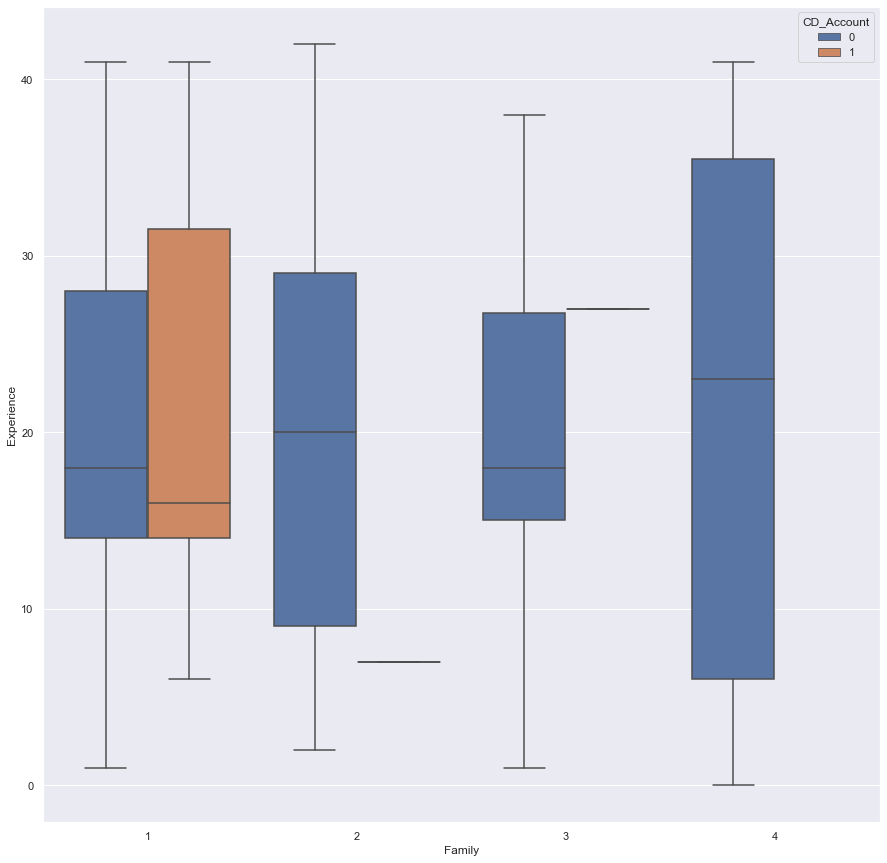

In [75]:
plt.figure(figsize=(15,15))
sns.boxplot(y=dfLoanModelWrongPredict['Experience'], x=dfLoanModelWrongPredict['Family'], hue= dfLoanModelWrongPredict['CD_Account']);

**Observations**
* Missclassified  customers with Family size bigger than 1 didn't have a CD_Acount, but for customers with Family size of 1 they were with both categorical vlaues of CD_Account.
* This distrubtion is similar to the previous one

#### Securities_Account vs Mortgage vs Family

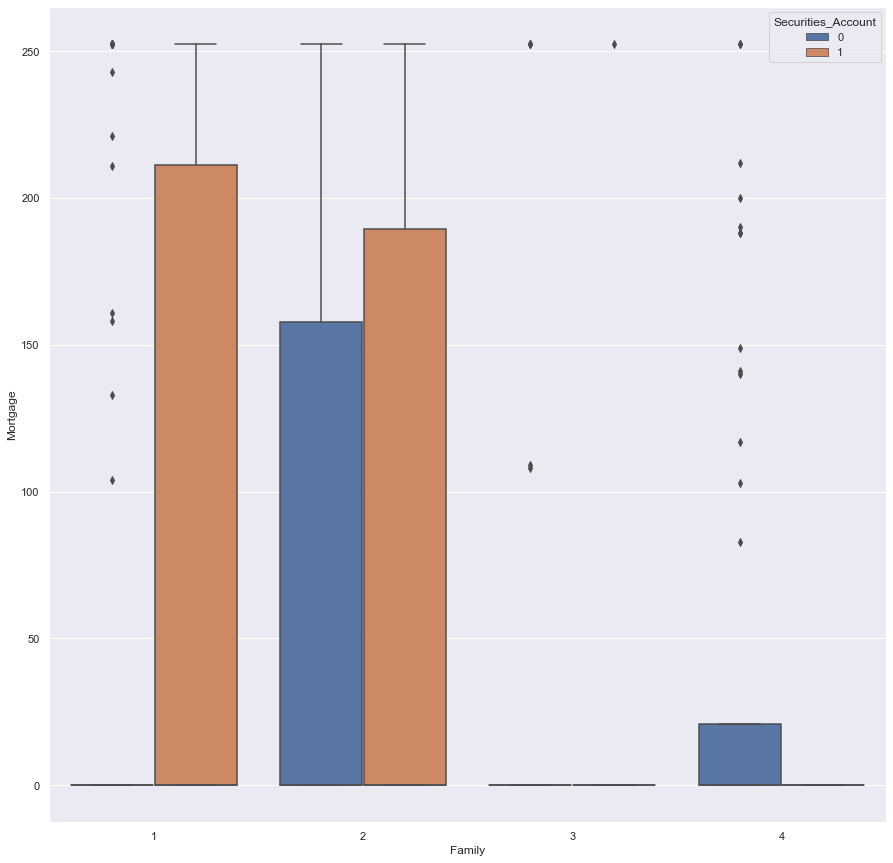

In [76]:
plt.figure(figsize=(15,15))
sns.boxplot(y=dfLoanModelWrongPredict['Mortgage'], x=dfLoanModelWrongPredict['Family'], hue= dfLoanModelWrongPredict['Securities_Account']);

**Observations**
- ALL the missclassified customers with Family size of 1 that have a Mortgage they do have a securites accounts .
- Missclassified customers with Family size of 3 didn't have a Mortgage.

#### Securities_Account vs Income vs Family

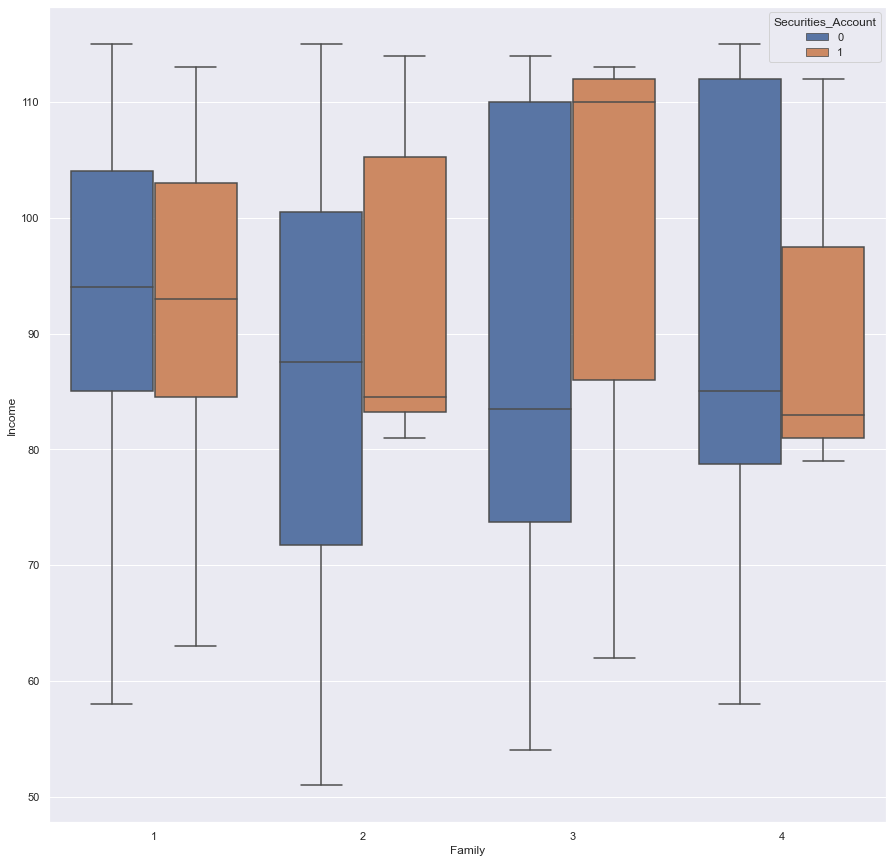

In [77]:
plt.figure(figsize=(15,15))
sns.boxplot(y=dfLoanModelWrongPredict['Income'], x=dfLoanModelWrongPredict['Family'], hue= dfLoanModelWrongPredict['Securities_Account']);

**Observations**
- The Income median was higher for customers without securities accounts for all family size except for customers with family size of 3 where the opposite is true.

#### Securities_Account vs Expereince vs Family

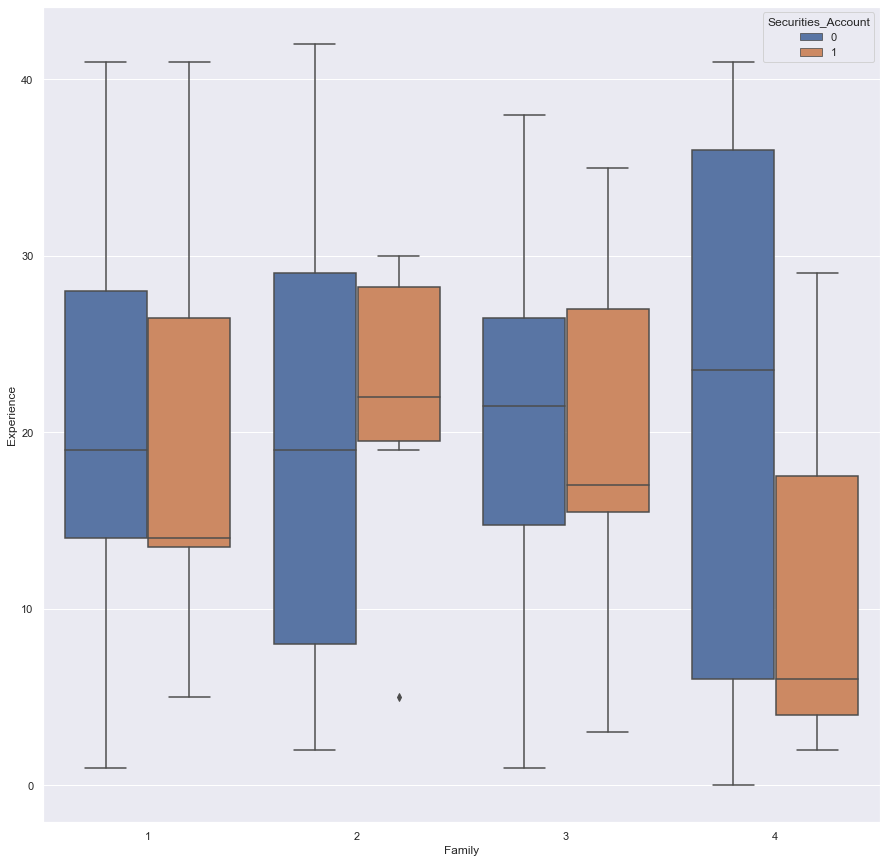

In [78]:
plt.figure(figsize=(15,15))
sns.boxplot(y=dfLoanModelWrongPredict['Experience'], x=dfLoanModelWrongPredict['Family'], hue= dfLoanModelWrongPredict['Securities_Account']);

**Observations**
- The Experience median was higher for customers without securities accounts for all family size except for customers with family size of 2 where the opposite is true.

### Exploratory Data Analysis Conclusion:
- 99.56% of the missclassified customers were predicted to accept the personal loan offer when actually rejected it.
- 96% of the missclassified customers they don't have a CD Account, and 88.15% of the missclassified customers  they don't have securities Account.
- Most of the missclassified customers they have an Advanced\Professional degree and a Family size of 1.
- All of the missclassified customers that have a Family size of two or more didn't have CD accounts.
- All of the missclassified customers that have a Mortgage and a Family size of 1 they did have CD and securites accounts.

## Conclusion:

- Beside the recommendations given to the marketing team in the **Insights and Conclusion** section to help in targeting the correct segement of customers that will accept the Personal Loan offer and therefore help in growing the business. we also recommend the following:
  - Encourage customers to have a CD account, probably by offering incentives in case they do so since more than half of the       bank customers that have a CD account did accept the Personal Loan offer.
  - Try to expand the bank customers number by launching a special compaigns to attract new customers. Only  Los Angles county     have a litle bit more that 1000 customers. For example a big County like San Fransisco have just 250 customers.
  - Encourage Families with a size of 3 or more to join the Bank.
  - Encourage customers with high Income to join Bank.
  - Reach out to new College graduates and offer them incentives if they do open an account with AllLife Bank.